In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

root_file = '../data/FuelsDataWBio/'
dist_file = '../data/fuel_class_distributions_2023.csv'
evt_file = '../data/LF2024_EVT.csv'
bps_file = '../data/LF16_BPS.csv'
dist_frame = pd.read_csv(dist_file)

# zones = [
#     6,
#     17,
#     18,
#     19,
#     26,
#     27,
#     28,
#     29,
#     30,
#     31,
#     32,
#     33,
#     34,
#     35,
#     36,
#     41
# ]

zones = [
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    41
]

pyromes= [
    31,33
]
eval_pyromes = [
    30
]
year = 2023
years = [
    # 2020,
    2021,
    2022,
    2023
]

from_vals = [
    91,92,93,98,99,
    101,102,103,104,105,106,107,108,109,
    121,122,123,124,
    141,142,143,144,145,146,147,148,149,
    161,162,163,164,165,
    181,182,183,184,185,186,187,188,189,
    201,202,203,204
]

to_vals = [
    1,1,1,1,1,
    2,2,2,2,2,2,2,2,2,
    3,3,3,3,
    4,4,4,4,4,4,4,4,4,
    5,5,5,5,5,
    6,6,6,6,6,6,6,6,6,
    7,7,7,7
]

In [2]:
bps_df = pd.read_csv(bps_file)
bps_classes = [11, 12, 31, 381, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617]
bps_class_names = ['Open Water', 'PerennialIce/Snow', 'Barren-Rock/Sand/Clay', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Western Great Plains Shortgrass Prairie', 'Western Great Plains Foothill and Piedmont Grassland', 'Wyoming Basins Dwarf Sagebrush Shrubland and Steppe', 'Southern Colorado Plateau Sand Shrubland', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'Chihuahuan Stabilized Coppice Dune and Sand Flat Scrub', 'Colorado Plateau Blackbrush-Mormon-tea Shrubland', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Sonora-Mojave Semi-Desert Chaparral', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Inter-Mountain Basins Montane Sagebrush Steppe - Mountain Big Sagebrush', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Inter-Mountain Basins Mat Saltbush Shrubland', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Colorado Plateau Blackbrush-Mormon-tea Shrubland', 'Sonora-Mojave Semi-Desert Chaparral', 'Southern Colorado Plateau Sand Shrubland', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'Mediterranean California Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Ponderosa Pine-Douglas-fir', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Larch', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Grand Fir', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest - Cedar Groves', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Columbia Plateau Scabland Shrubland', 'Rocky Mountain Alpine Dwarf-Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Columbia Basin Foothill and Canyon Dry Grassland', 'Inter-Mountain Basins Semi-Desert Grassland', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Columbia Basin Palouse Prairie', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Northern Rocky Mountain Conifer Swamp', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Northwestern Great Plains Aspen Forest and Parkland', 'Rocky Mountain Aspen Forest and Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Ponderosa Pine-Douglas-fir', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Larch', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Grand Fir', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest - Cedar Groves', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Rocky Mountain Alpine Dwarf-Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Rocky Mountain Alpine Fell-Field', 'Rocky Mountain Alpine Turf', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Northern Rocky Mountain Conifer Swamp', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland - Fire-maintained Savanna', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Colorado Plateau Pinyon-Juniper Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonora-Mojave Mixed Salt Desert Scrub', 'Sonoran Mid-Elevation Desert Scrub', 'Southern Colorado Plateau Sand Shrubland', 'Colorado Plateau Pinyon-Juniper Shrubland', 'Great Basin Semi-Desert Chaparral', 'Mogollon Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Sonora-Mojave Semi-Desert Chaparral', 'Sonoran Paloverde-Mixed Cacti Desert Scrub', 'Inter-Mountain Basins Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'North American Warm Desert Riparian Systems', 'North American Warm Desert Riparian Systems - Stringers', 'Rocky Mountain Montane Riparian Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Colorado Plateau Pinyon-Juniper Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Madrean Encinal', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Madrean Pinyon-Juniper Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonora-Mojave Mixed Salt Desert Scrub', 'Sonoran Granite Outcrop Desert Scrub', 'Sonoran Mid-Elevation Desert Scrub', 'Mogollon Chaparral', 'Sonora-Mojave Semi-Desert Chaparral', 'Sonoran Paloverde-Mixed Cacti Desert Scrub', 'Inter-Mountain Basins Juniper Savanna', 'Apacherian-Chihuahuan Semi-Desert Grassland and Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'North American Warm Desert Riparian Systems', 'North American Warm Desert Riparian Systems - Stringers', 'North Pacific Oak Woodland', 'California Coastal Redwood Forest', 'Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland', 'Klamath-Siskiyou Upper Montane Serpentine Mixed Conifer Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Red Fir Forest', 'Mediterranean California Subalpine Woodland', 'North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest', 'Mediterranean California Mixed Evergreen Forest', 'Northern California Mesic Subalpine Woodland', 'California Maritime Chaparral', 'California Mesic Chaparral', 'California Montane Woodland and Chaparral', 'California Xeric Serpentine Chaparral', 'Northern and Central California Dry-Mesic Chaparral', 'California Coastal Live Oak Woodland and Savanna', 'California Lower Montane Blue Oak-Foothill Pine Woodland and Savanna', 'Northern California Coastal Scrub', 'California Mesic Serpentine Grassland', 'California Northern Coastal Grassland', 'Mediterranean California Subalpine Meadow', 'North Pacific Montane Grassland', 'California Montane Riparian Systems', 'Pacific Coastal Marsh Systems', 'Klamath-Siskiyou Xeromorphic Serpentine Savanna and Chaparral', 'California Coastal Closed-Cone Conifer Forest and Woodland', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Mediterranean California Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Columbia Plateau Western Juniper Woodland and Savanna', 'Great Basin Pinyon-Juniper Woodland', 'Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland', 'Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Red Fir Forest - Cascades', 'Mediterranean California Red Fir Forest - Southern Sierra', 'Mediterranean California Subalpine Woodland', 'Mediterranean California Mesic Serpentine Woodland and Chaparral', 'Mediterranean California Mixed Evergreen Forest', 'Northern California Mesic Subalpine Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland - Wet', 'Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland - Dry', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Mediterranean California Alpine Fell-Field', 'Sierra Nevada Alpine Dwarf-Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'California Mesic Chaparral', 'California Montane Woodland and Chaparral', 'Great Basin Semi-Desert Chaparral', 'Northern and Central California Dry-Mesic Chaparral', 'California Lower Montane Blue Oak-Foothill Pine Woodland and Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Mediterranean California Alpine Dry Tundra', 'Mediterranean California Subalpine Meadow', 'North Pacific Montane Grassland', 'California Montane Riparian Systems', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Columbia Plateau Western Juniper Woodland and Savanna', 'Great Basin Pinyon-Juniper Woodland', 'Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna - Mesic', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna - Xeric', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Columbia Plateau Scabland Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Columbia Basin Foothill and Canyon Dry Grassland', 'Inter-Mountain Basins Semi-Desert Grassland', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Columbia Basin Palouse Prairie', 'Rocky Mountain Alpine Fell-Field', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Northern Rocky Mountain Conifer Swamp', 'Northern Rocky Mountain Foothill Conifer Wooded Steppe', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Columbia Plateau Western Juniper Woodland and Savanna', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna - Mesic', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Columbia Plateau Scabland Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Columbia Basin Foothill and Canyon Dry Grassland', 'Inter-Mountain Basins Semi-Desert Grassland', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Columbia Basin Palouse Prairie', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Northern Rocky Mountain Foothill Conifer Wooded Steppe', 'Rocky Mountain Aspen Forest and Woodland', 'Rocky Mountain Bigtooth Maple Ravine Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Rocky Mountain Alpine Dwarf-Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland - Basin Big Sagebrush', 'Inter-Mountain Basins Big Sagebrush Shrubland - Wyoming Big Sagebrush', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Rocky Mountain Alpine Fell-Field', 'Rocky Mountain Alpine Turf', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Northern Rocky Mountain Conifer Swamp', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'North Pacific Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'North Pacific Oak Woodland', 'East Cascades Mesic Montane Mixed-Conifer Forest and Woodland', 'North Pacific Dry Douglas-fir(-Madrone) Forest and Woodland', 'North Pacific Hypermaritime Sitka Spruce Forest', 'North Pacific Maritime Dry-Mesic Douglas-fir-Western Hemlock Forest', 'North Pacific Maritime Mesic Subalpine Parkland', 'North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest', 'North Pacific Mountain Hemlock Forest - Wet', 'North Pacific Mountain Hemlock Forest - Xeric', 'North Pacific Mesic Western Hemlock-Silver Fir Forest', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna - Mesic', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'East Cascades Oak-Ponderosa Pine Forest and Woodland', 'North Pacific Broadleaf Landslide Forest and Shrubland', 'Columbia Plateau Scabland Shrubland', 'North Pacific Dry and Mesic Alpine Dwarf-Shrubland or Fell-field or Meadow', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'North Pacific Avalanche Chute Shrubland', 'North Pacific Montane Shrubland', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Willamette Valley Upland Prairie and Savanna', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'North Pacific Montane Grassland', 'Inter-Mountain Basins Montane Riparian Systems', 'North Pacific Lowland Riparian Forest and Shrubland', 'North Pacific Swamp Systems', 'North Pacific Montane Riparian Woodland and Shrubland - Wet', 'North Pacific Montane Riparian Woodland and Shrubland - Dry', 'Northern Rocky Mountain Foothill Conifer Wooded Steppe', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'North Pacific Alpine and Subalpine Dry Grassland', 'North Pacific Wooded Volcanic Flowage', 'North Pacific Dry-Mesic Silver Fir-Western Hemlock-Douglas-fir Forest', 'North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest', 'North Pacific Oak Woodland', 'California Coastal Redwood Forest', 'Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland', 'Klamath-Siskiyou Upper Montane Serpentine Mixed Conifer Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Red Fir Forest', 'North Pacific Dry Douglas-fir(-Madrone) Forest and Woodland', 'North Pacific Hypermaritime Sitka Spruce Forest', 'North Pacific Maritime Dry-Mesic Douglas-fir-Western Hemlock Forest', 'North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest', 'Mediterranean California Mixed Evergreen Forest', 'East Cascades Oak-Ponderosa Pine Forest and Woodland', 'North Pacific Broadleaf Landslide Forest and Shrubland', 'Willamette Valley Upland Prairie and Savanna', 'Northern California Coastal Scrub', 'California Northern Coastal Grassland', 'California Montane Riparian Systems', 'North Pacific Lowland Riparian Forest and Shrubland', 'North Pacific Swamp Systems', 'North Pacific Montane Riparian Woodland and Shrubland - Wet', 'North Pacific Montane Riparian Woodland and Shrubland - Dry', 'Klamath-Siskiyou Xeromorphic Serpentine Savanna and Chaparral', 'North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Mediterranean California Sparsely Vegetated Systems', 'North Pacific Sparsely Vegetated Systems', 'North Pacific Oak Woodland', 'Rocky Mountain Aspen Forest and Woodland', 'Columbia Plateau Western Juniper Woodland and Savanna', 'East Cascades Mesic Montane Mixed-Conifer Forest and Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland', 'Klamath-Siskiyou Upper Montane Serpentine Mixed Conifer Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Red Fir Forest', 'Mediterranean California Subalpine Woodland', 'Mediterranean California Mesic Serpentine Woodland and Chaparral', 'North Pacific Dry Douglas-fir(-Madrone) Forest and Woodland', 'North Pacific Maritime Dry-Mesic Douglas-fir-Western Hemlock Forest', 'North Pacific Maritime Mesic Subalpine Parkland', 'North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest', 'North Pacific Mountain Hemlock Forest - Wet', 'North Pacific Mountain Hemlock Forest - Xeric', 'North Pacific Mesic Western Hemlock-Silver Fir Forest', 'Mediterranean California Mixed Evergreen Forest', 'Northern California Mesic Subalpine Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna - Mesic', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna - Xeric', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland', 'East Cascades Oak-Ponderosa Pine Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'North Pacific Broadleaf Landslide Forest and Shrubland', 'North Pacific Dry and Mesic Alpine Dwarf-Shrubland or Fell-field or Meadow', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'California Mesic Chaparral', 'California Montane Woodland and Chaparral', 'Great Basin Semi-Desert Chaparral', 'Northern and Central California Dry-Mesic Chaparral', 'California Lower Montane Blue Oak-Foothill Pine Woodland and Savanna', 'Willamette Valley Upland Prairie and Savanna', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'California Montane Riparian Systems', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'North Pacific Lowland Riparian Forest and Shrubland', 'North Pacific Montane Riparian Woodland and Shrubland - Wet', 'North Pacific Montane Riparian Woodland and Shrubland - Dry', 'Northern Rocky Mountain Foothill Conifer Wooded Steppe', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'Klamath-Siskiyou Xeromorphic Serpentine Savanna and Chaparral', 'North Pacific Alpine and Subalpine Dry Grassland', 'Sierran-Intermontane Desert Western White Pine-White Fir Woodland', 'North Pacific Wooded Volcanic Flowage', 'North Pacific Dry-Mesic Silver Fir-Western Hemlock-Douglas-fir Forest', 'North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest', 'Western Great Plains Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Ponderosa Pine-Douglas-fir', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest - Lodgepole Pine', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Northwestern Great Plains Shrubland', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Northwestern Great Plains Mixedgrass Prairie', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Western Great Plains Sand Prairie', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Western Great Plains Floodplain Systems', 'Western Great Plains Wooded Draw and Ravine', 'Western Great Plains Depressional Wetland Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Rocky Mountain Lodgepole Pine Forest', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Inter-Mountain Basins Mat Saltbush Shrubland', 'Wyoming Basins Dwarf Sagebrush Shrubland and Steppe', 'Inter-Mountain Basins Big Sagebrush Shrubland - Basin Big Sagebrush', 'Inter-Mountain Basins Big Sagebrush Shrubland - Wyoming Big Sagebrush', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland - No True Mountain Mahogany', 'Rocky Mountain Lower Montane-Foothill Shrubland - True Mountain Mahogany', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Rocky Mountain Alpine Turf', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Western Great Plains Floodplain Systems', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Mediterranean California Sparsely Vegetated Systems', 'Central and Southern California Mixed Evergreen Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Mixed Evergreen Forest', 'Sonora-Mojave Mixed Salt Desert Scrub', 'California Mesic Chaparral', 'Northern and Central California Dry-Mesic Chaparral', 'Sonora-Mojave Semi-Desert Chaparral', 'California Central Valley Mixed Oak Savanna', 'California Lower Montane Blue Oak-Foothill Pine Woodland and Savanna', 'California Central Valley and Southern Coastal Grassland', 'North Pacific Montane Grassland', 'California Central Valley Riparian Woodland and Shrubland', 'California Montane Riparian Systems', 'Pacific Coastal Marsh Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Central and Southern California Mixed Evergreen Woodland', 'California Coastal Redwood Forest', 'Great Basin Pinyon-Juniper Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Black Oak-Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Mesic Serpentine Woodland and Chaparral', 'Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonora-Mojave Mixed Salt Desert Scrub', 'Southern California Coastal Scrub', 'California Maritime Chaparral', 'California Mesic Chaparral', 'California Montane Woodland and Chaparral', 'California Xeric Serpentine Chaparral', 'Northern and Central California Dry-Mesic Chaparral', 'Sonora-Mojave Semi-Desert Chaparral', 'Sonoran Paloverde-Mixed Cacti Desert Scrub', 'Southern California Dry-Mesic Chaparral', 'California Central Valley Mixed Oak Savanna', 'California Coastal Live Oak Woodland and Savanna', 'California Lower Montane Blue Oak-Foothill Pine Woodland and Savanna', 'Southern California Oak Woodland and Savanna', 'Northern California Coastal Scrub', 'California Central Valley and Southern Coastal Grassland', 'California Mesic Serpentine Grassland', 'California Northern Coastal Grassland', 'California Central Valley Riparian Woodland and Shrubland', 'California Montane Riparian Systems', 'North American Warm Desert Riparian Systems', 'Pacific Coastal Marsh Systems', 'California Coastal Closed-Cone Conifer Forest and Woodland', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Rocky Mountain Bigtooth Maple Ravine Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Rocky Mountain Lodgepole Pine Forest', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland - Low Elevation', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland - High Elevation', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Rocky Mountain Alpine Dwarf-Shrubland', 'Colorado Plateau Blackbrush-Mormon-tea Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Southern Colorado Plateau Sand Shrubland', 'Colorado Plateau Pinyon-Juniper Shrubland', 'Great Basin Semi-Desert Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland  - Continuous', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland - Patchy', 'Inter-Mountain Basins Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe - Mountain Big Sagebrush', 'Inter-Mountain Basins Montane Sagebrush Steppe - Low Sagebrush', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Rocky Mountain Alpine Turf', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Rocky Mountain Lodgepole Pine Forest', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland - Low Elevation', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland - High Elevation', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Inter-Mountain Basins Mat Saltbush Shrubland', 'Colorado Plateau Blackbrush-Mormon-tea Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Southern Colorado Plateau Sand Shrubland', 'Colorado Plateau Pinyon-Juniper Shrubland', 'Great Basin Semi-Desert Chaparral', 'Mogollon Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe - Mountain Big Sagebrush', 'Inter-Mountain Basins Montane Sagebrush Steppe - Low Sagebrush', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Columbia Plateau Western Juniper Woodland and Savanna', 'Great Basin Pinyon-Juniper Woodland', 'Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Subalpine Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonora-Mojave Mixed Salt Desert Scrub', 'Great Basin Semi-Desert Chaparral', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Rocky Mountain Alpine Turf', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Rocky Mountain Bigtooth Maple Ravine Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Great Basin Semi-Desert Chaparral', 'Mogollon Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Sonora-Mojave Semi-Desert Chaparral', 'Inter-Mountain Basins Juniper Savanna', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Madrean Encinal', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Madrean Pinyon-Juniper Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland - Low Elevation', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Inter-Mountain Basins Mat Saltbush Shrubland', 'Colorado Plateau Blackbrush-Mormon-tea Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Southern Colorado Plateau Sand Shrubland', 'Colorado Plateau Pinyon-Juniper Shrubland', 'Mogollon Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Madrean Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Apacherian-Chihuahuan Semi-Desert Grassland and Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Rocky Mountain Lodgepole Pine Forest', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Rocky Mountain Alpine Dwarf-Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Colorado Plateau Pinyon-Juniper Shrubland', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Inter-Mountain Basins Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Rocky Mountain Alpine Fell-Field', 'Rocky Mountain Alpine Turf', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Colorado Plateau Pinyon-Juniper Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Madrean Encinal', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Madrean Pinyon-Juniper Woodland', 'Madrean Upper Montane Conifer-Oak Forest and Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Chihuahuan Succulent Desert Scrub', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonoran Mid-Elevation Desert Scrub', 'Chihuahuan Mixed Desert and Thorn Scrub', 'Colorado Plateau Pinyon-Juniper Shrubland', 'Mogollon Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Sonoran Paloverde-Mixed Cacti Desert Scrub', 'Inter-Mountain Basins Juniper Savanna', 'Madrean Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Apacherian-Chihuahuan Semi-Desert Grassland and Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'North American Warm Desert Riparian Systems', 'North American Warm Desert Riparian Systems - Stringers', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Rocky Mountain Bigtooth Maple Ravine Woodland', 'Columbia Plateau Western Juniper Woodland and Savanna', 'Great Basin Pinyon-Juniper Woodland', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Rocky Mountain Lodgepole Pine Forest', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Inter-Mountain Basins Semi-Desert Grassland', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Western Great Plains Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Northwestern Great Plains Highland White Spruce Woodland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Inter-Mountain Basins Mat Saltbush Shrubland', 'Wyoming Basins Dwarf Sagebrush Shrubland and Steppe', 'Northwestern Great Plains Shrubland', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Northwestern Great Plains Mixedgrass Prairie', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Western Great Plains Sand Prairie', 'Western Great Plains Shortgrass Prairie', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Rocky Mountain Subalpine/Upper Montane Riparian Systems', 'Western Great Plains Floodplain Systems', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna - Low Elevation Woodland', 'Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna - Savanna', 'Western Great Plains Wooded Draw and Ravine', 'Western Great Plains Sparsely Vegetated Systems', 'Northwestern Great Plains Shrubland', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Northwestern Great Plains Mixedgrass Prairie', 'Western Great Plains Sand Prairie', 'Inter-Mountain Basins Greasewood Flat', 'Western Great Plains Floodplain Systems', 'Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna - Low Elevation Woodland', 'Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna - Savanna', 'Western Great Plains Wooded Draw and Ravine', 'Great Plains Prairie Pothole', 'Western Great Plains Depressional Wetland Systems', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'Atlantic Coastal Plain Dry and Dry-Mesic Oak Forest', 'Atlantic Coastal Plain Mesic Hardwood Forest', 'Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland', 'Atlantic Coastal Plain Upland Longleaf Pine Woodland', 'East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland', 'Florida Longleaf Pine Sandhill', 'Southern Coastal Plain Mesic Slope Forest', 'East Gulf Coastal Plain Maritime Forest', 'Southern Atlantic Coastal Plain Maritime Forest', 'Florida Peninsula Inland Scrub', 'Southern Atlantic Coastal Plain Wet Pine Savanna and Flatwoods', 'Central Florida Pine Flatwoods', 'East Gulf Coastal Plain Near-Coast Pine Flatwoods', 'Southern Coastal Plain Nonriverine Cypress Dome', 'Southern Coastal Plain Seepage Swamp and Baygall', 'Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'East Gulf Coastal Plain Savanna and Wet Prairie', 'Floridian Highlands Freshwater Marsh', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'South Florida Hardwood Hammock', 'Southwest Florida Coastal Strand and Maritime Hammock', 'Southeast Florida Coastal Strand and Maritime Hammock', 'Florida Longleaf Pine Sandhill', 'South Florida Pine Rockland', 'Florida Peninsula Inland Scrub', 'Florida Dry Prairie', 'South Florida Dwarf Cypress Savanna', 'South Florida Pine Flatwoods', 'South Florida Cypress Dome', 'Central Florida Pine Flatwoods', 'East Gulf Coastal Plain Near-Coast Pine Flatwoods', 'Southern Coastal Plain Nonriverine Cypress Dome', 'Southern Coastal Plain Seepage Swamp and Baygall', 'Caribbean Coastal Wetland Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Caribbean Swamp Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'South Florida Everglades Sawgrass Marsh', 'Floridian Highlands Freshwater Marsh', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Colorado Plateau Pinyon-Juniper Woodland', 'Madrean Encinal', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Madrean Pinyon-Juniper Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Chihuahuan Creosotebush Desert Scrub', 'Chihuahuan Mixed Salt Desert Scrub', 'Chihuahuan Succulent Desert Scrub', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonora-Mojave Mixed Salt Desert Scrub', 'Sonoran Mid-Elevation Desert Scrub', 'Western Great Plains Sandhill Steppe', 'Chihuahuan Mixed Desert Shrubland', 'Chihuahuan Grama Grass-Creosote Steppe', 'Madrean Oriental Chaparral', 'Mogollon Chaparral', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Sonora-Mojave Semi-Desert Chaparral', 'Sonoran Paloverde-Mixed Cacti Desert Scrub', 'Madrean Juniper Savanna', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Apacherian-Chihuahuan Semi-Desert Grassland and Steppe', 'Chihuahuan Gypsophilous Grassland and Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Chihuahuan Sandy Plains Semi-Desert Grassland', 'Inter-Mountain Basins Semi-Desert Grassland', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Western Great Plains Shortgrass Prairie', 'Inter-Mountain Basins Greasewood Flat', 'North American Warm Desert Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Chihuahuan Loamy Plains Desert Grassland', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland', 'North American Warm Desert Sparsely Vegetated Systems', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Madrean Pinyon-Juniper Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'Chihuahuan Creosotebush Desert Scrub', 'Chihuahuan Mixed Salt Desert Scrub', 'Chihuahuan Stabilized Coppice Dune and Sand Flat Scrub', 'Chihuahuan Succulent Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Western Great Plains Sandhill Steppe', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'Chihuahuan Mixed Desert and Thorn Scrub', 'Madrean Oriental Chaparral', 'Western Great Plains Mesquite Woodland and Shrubland', 'Madrean Juniper Savanna', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Apacherian-Chihuahuan Semi-Desert Grassland and Steppe', 'Chihuahuan Gypsophilous Grassland and Steppe', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Western Great Plains Shortgrass Prairie', 'North American Warm Desert Riparian Systems', 'Rocky Mountain Montane Riparian Systems', 'Edwards Plateau Limestone Shrubland', 'Western Great Plains Depressional Wetland Systems - Playa', 'Chihuahuan Loamy Plains Desert Grassland', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland - Tobosa Grassland', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland - Alkali Sacaton', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Western Great Plains Sandhill Steppe', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Western Great Plains Mesquite Woodland and Shrubland', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Central Mixedgrass Prairie', 'Western Great Plains Foothill and Piedmont Grassland', 'Western Great Plains Shortgrass Prairie', 'Rocky Mountain Montane Riparian Systems', 'Western Great Plains Floodplain Systems', 'Northwestern Great Plains Canyon', 'Western Great Plains Depressional Wetland Systems', 'Western Great Plains Sparsely Vegetated Systems', 'Western Great Plains Sandhill Steppe', 'Western Great Plains Mesquite Woodland and Shrubland', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Central Mixedgrass Prairie', 'Western Great Plains Sand Prairie', 'Western Great Plains Shortgrass Prairie', 'Western Great Plains Floodplain Systems', 'Edwards Plateau Limestone Shrubland', 'Western Great Plains Depressional Wetland Systems - Playa', 'Western Great Plains Depressional Wetland Systems - Saline', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland - Tobosa Grassland', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland - Alkali Sacaton', 'West Gulf Coastal Plain Mesic Hardwood Forest', 'West Gulf Coastal Plain Chenier and Upper Texas Coastal Fringe Forest and Woodland', 'West Gulf Coastal Plain Upland Longleaf Pine Forest and Woodland', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'West Gulf Coastal Plain Sandhill Oak and Shortleaf Pine Forest and Woodland', 'Southern Blackland Tallgrass Prairie', 'West Gulf Coastal Plain Northern Calcareous Prairie', 'West Gulf Coastal Plain Southern Calcareous Prairie', 'Texas-Louisiana Coastal Prairie', 'West Gulf Coastal Plain Wet Longleaf Pine Savanna and Flatwoods', 'West Gulf Coastal Plain Pine-Hardwood Flatwoods', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'West Gulf Coastal Plain Nonriverine Wet Hardwood Flatwoods', 'East-Central Texas Plains Post Oak Savanna and Woodland', 'Atlantic Coastal Plain Dry and Dry-Mesic Oak Forest', 'Atlantic Coastal Plain Mesic Hardwood Forest', 'Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland', 'Atlantic Coastal Plain Upland Longleaf Pine Woodland', 'Southern Coastal Plain Mesic Slope Forest', 'Central Atlantic Coastal Plain Maritime Forest', 'Southern Atlantic Coastal Plain Maritime Forest', 'Southern Atlantic Coastal Plain Dune and Maritime Grassland', 'Central Atlantic Coastal Plain Wet Longleaf Pine Savanna and Flatwoods', 'Southern Atlantic Coastal Plain Wet Pine Savanna and Flatwoods', 'Atlantic Coastal Plain Peatland Pocosin and Canebrake', 'Atlantic Coastal Plain Clay-Based Carolina Bay Wetland', 'Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Central Atlantic Coastal Plain Nonriverine Swamp and Wet Hardwood Forest', 'Inter-Mountain Basins Sparsely Vegetated Systems', 'Western Great Plains Sparsely Vegetated Systems', 'Rocky Mountain Aspen Forest and Woodland', 'Rocky Mountain Bigtooth Maple Ravine Woodland', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Ponderosa Pine Woodland - South', 'Southern Rocky Mountain Ponderosa Pine Woodland - North', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub - South', 'Inter-Mountain Basins Mixed Salt Desert Scrub - North', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Western Great Plains Sandhill Steppe', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Western Great Plains Mesquite Woodland and Shrubland', 'Southern Rocky Mountain Ponderosa Pine Savanna - South', 'Southern Rocky Mountain Ponderosa Pine Savanna - North', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Apacherian-Chihuahuan Semi-Desert Grassland and Steppe', 'Chihuahuan Gypsophilous Grassland and Steppe', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Western Great Plains Foothill and Piedmont Grassland', 'Western Great Plains Shortgrass Prairie', 'Inter-Mountain Basins Greasewood Flat', 'Rocky Mountain Montane Riparian Systems', 'Western Great Plains Floodplain Systems', 'Western Great Plains Depressional Wetland Systems', 'Chihuahuan Loamy Plains Desert Grassland', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland', 'West Gulf Coastal Plain Mesic Hardwood Forest', 'West Gulf Coastal Plain Chenier and Upper Texas Coastal Fringe Forest and Woodland', 'West Gulf Coastal Plain Upland Longleaf Pine Forest and Woodland', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'Mississippi Delta Maritime Forest', 'Texas-Louisiana Coastal Prairie', 'West Gulf Coastal Plain Wet Longleaf Pine Savanna and Flatwoods', 'West Gulf Coastal Plain Pine-Hardwood Flatwoods', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems', 'Southern Crowley`s Ridge Mesic Loess Slope Forest', 'West Gulf Coastal Plain Mesic Hardwood Forest', 'East Gulf Coastal Plain Northern Loess Bluff Forest', 'East Gulf Coastal Plain Southern Loess Bluff Forest', 'West Gulf Coastal Plain Upland Longleaf Pine Forest and Woodland', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'Lower Mississippi River Dune Woodland and Forest', 'West Gulf Coastal Plain Southern Calcareous Prairie', 'Lower Mississippi Alluvial Plain Grand Prairie', 'West Gulf Coastal Plain Pine-Hardwood Flatwoods', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Mississippi River Alluvial Plain Dry-Mesic Loess Slope Forest', 'Northern Crowley`s Ridge Sand Forest', 'Lower Mississippi River Flatwoods', 'Laurentian-Acadian Northern Hardwoods Forest', 'Laurentian-Acadian Northern Hardwoods Forest - Hemlock', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Beech-Maple Forest', 'North-Central Interior Maple-Basswood Forest', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Boreal White Spruce-Fir-Hardwood Forest - Inland', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens', 'Laurentian Pine-Oak Barrens', 'Laurentian-Acadian Jack Pine Barrens and Forest', 'Great Lakes Alvar', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Central Tallgrass Prairie', 'Eastern Boreal Floodplain', 'Great Lakes Wooded Dune and Swale', 'Central Interior and Appalachian Floodplain Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Laurentian-Acadian Alkaline Conifer-Hardwood Swamp', 'Great Lakes Coastal Marsh Systems', 'Central Interior and Appalachian Shrub-Herbaceous Wetland Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'Paleozoic Plateau Bluff and Talus', 'Laurentian-Acadian Northern Hardwoods Forest', 'Laurentian-Acadian Northern Hardwoods Forest - Hemlock', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Maple-Basswood Forest', 'Eastern Great Plains Tallgrass Aspen Parkland', 'Boreal Jack Pine-Black Spruce Forest', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Laurentian-Acadian Northern Pine Forest', 'Boreal White Spruce-Fir-Hardwood Forest - Inland', 'Boreal White Spruce-Fir-Hardwood Forest - Coastal', 'Boreal White Spruce-Fir-Hardwood Forest - Aspen-Birch', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens', 'Laurentian Pine-Oak Barrens', 'Laurentian-Acadian Jack Pine Barrens and Forest', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Northern Tallgrass Prairie', 'Eastern Boreal Floodplain', 'Central Interior and Appalachian Floodplain Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Laurentian-Acadian Alkaline Conifer-Hardwood Swamp', 'Great Lakes Coastal Marsh Systems', 'Central Interior and Appalachian Shrub-Herbaceous Wetland Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'Laurentian-Acadian Northern Hardwoods Forest', 'Laurentian-Acadian Northern Hardwoods Forest - Hemlock', 'Northern Sugar Maple-Basswood Forest', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Beech-Maple Forest', 'Great Lakes Pine Barrens', 'Great Lakes Spruce-Fir', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Boreal White Spruce-Fir-Hardwood Forest - Inland', 'Boreal White Spruce-Fir-Hardwood Forest - Coastal', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens', 'Laurentian Pine-Oak Barrens', 'Laurentian-Acadian Jack Pine Barrens and Forest', 'Great Lakes Wet-Mesic Lakeplain Prairie', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Central Tallgrass Prairie', 'Eastern Boreal Floodplain', 'Great Lakes Wooded Dune and Swale', 'Central Interior and Appalachian Floodplain Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acid Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Laurentian-Acadian Alkaline Conifer-Hardwood Swamp', 'Great Lakes Coastal Marsh Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'Western Great Plains Dry Bur Oak Forest and Woodland', 'Northwestern Great Plains Mixedgrass Prairie', 'Western Great Plains Tallgrass Prairie', 'Western Great Plains Floodplain Systems', 'Boreal Aspen-Birch Forest', 'Laurentian-Acadian Northern Hardwoods Forest', 'North-Central Interior Maple-Basswood Forest', 'Eastern Great Plains Tallgrass Aspen Parkland', 'Boreal White Spruce-Fir-Hardwood Forest - Inland', 'Western Great Plains Wooded Draw and Ravine', 'North-Central Interior Oak Savanna', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Northern Tallgrass Prairie', 'Eastern Great Plains Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Great Plains Prairie Pothole', 'Western Great Plains Depressional Wetland Systems', 'Western Great Plains Dry Bur Oak Forest and Woodland', 'Northwestern Great Plains Mixedgrass Prairie', 'Western Great Plains Tallgrass Prairie', 'Western Great Plains Floodplain Systems', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Maple-Basswood Forest', 'Eastern Great Plains Tallgrass Aspen Parkland', 'Western Great Plains Wooded Draw and Ravine', 'North-Central Interior Oak Savanna', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Northern Tallgrass Prairie', 'Eastern Great Plains Floodplain Systems', 'Great Plains Prairie Pothole', 'Western Great Plains Depressional Wetland Systems', 'Western Great Plains Sparsely Vegetated Systems', 'Western Great Plains Dry Bur Oak Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland and Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Western Great Plains Sandhill Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Central Mixedgrass Prairie', 'Northwestern Great Plains Mixedgrass Prairie', 'Western Great Plains Sand Prairie', 'Western Great Plains Shortgrass Prairie', 'Western Great Plains Tallgrass Prairie', 'Western Great Plains Floodplain Systems', 'Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna', 'Western Great Plains Wooded Draw and Ravine', 'Central Tallgrass Prairie', 'Eastern Great Plains Floodplain Systems', 'Western Great Plains Depressional Wetland Systems', 'Western Great Plains Sandhill Steppe', 'Western Great Plains Mesquite Woodland and Shrubland', 'Central Mixedgrass Prairie', 'Western Great Plains Sand Prairie', 'Western Great Plains Floodplain Systems', 'Ozark-Ouachita Dry-Mesic Oak Forest', 'Crosstimbers Oak Forest and Woodland', 'West Gulf Coastal Plain Mesic Hardwood Forest', 'Ozark-Ouachita Mesic Hardwood Forest', 'Ozark-Ouachita Dry Oak Woodland', 'Ozark-Ouachita Shortleaf Pine-Oak Forest and Woodland', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'Edwards Plateau Limestone Savanna and Woodland', 'Edwards Plateau Limestone Shrubland', 'Southern Blackland Tallgrass Prairie', 'Southeastern Great Plains Tallgrass Prairie', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland', 'East-Central Texas Plains Post Oak Savanna and Woodland', 'Edwards Plateau Dry-Mesic Slope Forest and Woodland', 'Western Great Plains Sandhill Steppe', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'Western Great Plains Mesquite Woodland and Shrubland', 'Central Mixedgrass Prairie', 'Western Great Plains Sand Prairie', 'Western Great Plains Shortgrass Prairie', 'North American Warm Desert Riparian Systems', 'Western Great Plains Floodplain Systems', 'Crosstimbers Oak Forest and Woodland', 'East-Central Texas Plains Southern Pine Forest and Woodland', 'Edwards Plateau Limestone Savanna and Woodland', 'Tamaulipan Mixed Deciduous Thornscrub', 'Tamaulipan Calcareous Thornscrub', 'Edwards Plateau Limestone Shrubland', 'Llano Uplift Acidic Forest-Woodland-Glade', 'Southern Blackland Tallgrass Prairie', 'Southeastern Great Plains Tallgrass Prairie', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Western Great Plains Depressional Wetland Systems', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland', 'East-Central Texas Plains Post Oak Savanna and Woodland', 'Edwards Plateau Dry-Mesic Slope Forest and Woodland', 'Edwards Plateau Mesic Canyon', 'Edwards Plateau Riparian', 'West Gulf Coastal Plain Mesic Hardwood Forest', 'Central and South Texas Coastal Fringe Forest and Woodland', 'West Gulf Coastal Plain Chenier and Upper Texas Coastal Fringe Forest and Woodland', 'East-Central Texas Plains Southern Pine Forest and Woodland', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'Edwards Plateau Limestone Savanna and Woodland', 'Tamaulipan Mixed Deciduous Thornscrub', 'Tamaulipan Calcareous Thornscrub', 'Southern Blackland Tallgrass Prairie', 'Texas-Louisiana Coastal Prairie', 'Central and Upper Texas Coast Dune and Coastal Grassland', 'Tamaulipan Savanna Grassland', 'South Texas Lomas', 'Tamaulipan Clay Grassland', 'South Texas Sand Sheet Grassland', 'Tamaulipan Floodplain', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Tamaulipan Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Texas-Louisiana Saline Coastal Prairie', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Western Great Plains Depressional Wetland Systems', 'East-Central Texas Plains Post Oak Savanna and Woodland', 'East Gulf Coastal Plain Northern Dry Upland Hardwood Forest', 'East Gulf Coastal Plain Northern Mesic Hardwood Slope Forest', 'East Gulf Coastal Plain Northern Loess Bluff Forest', 'East Gulf Coastal Plain Limestone Forest', 'East Gulf Coastal Plain Southern Loess Bluff Forest', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Coastal Plain Mesic Slope Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'East Gulf Coastal Plain Interior Shortleaf Pine-Oak Forest', 'Southern Coastal Plain Blackland Prairie and Woodland', 'East Gulf Coastal Plain Southern Loblolly-Hardwood Flatwoods', 'Southern Coastal Plain Seepage Swamp and Baygall', 'Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall', 'Central Interior and Appalachian Riparian Systems', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'East Gulf Coastal Plain Limestone Forest', 'East Gulf Coastal Plain Southern Loess Bluff Forest', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland', 'Florida Longleaf Pine Sandhill', 'Southern Coastal Plain Mesic Slope Forest', 'East Gulf Coastal Plain Interior Shortleaf Pine-Oak Forest', 'East Gulf Coastal Plain Maritime Forest', 'East Gulf Coastal Plain Dune and Coastal Grassland', 'East Gulf Coastal Plain Near-Coast Pine Flatwoods', 'East Gulf Coastal Plain Southern Loblolly-Hardwood Flatwoods', 'Southern Coastal Plain Nonriverine Cypress Dome', 'Southern Coastal Plain Seepage Swamp and Baygall', 'Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'East Gulf Coastal Plain Savanna and Wet Prairie', 'Floridian Highlands Freshwater Marsh', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems', 'Southern Appalachian Oak Forest', 'Southern Piedmont Mesic Forest', 'Southern and Central Appalachian Cove Forest', 'Piedmont Hardpan Woodland and Forest', 'Southeastern Interior Longleaf Pine Woodland', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Southern Appalachian Northern Hardwood Forest', 'Southern Appalachian Oak Forest', 'Southern Piedmont Mesic Forest', 'Allegheny-Cumberland Dry Oak Forest and Woodland', 'Southern and Central Appalachian Cove Forest', 'Central and Southern Appalachian Montane Oak Forest', 'South-Central Interior Mesophytic Forest', 'Central and Southern Appalachian Spruce-Fir Forest', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'Southern Ridge and Valley/Cumberland Dry Calcareous Forest', 'Southern Appalachian Grass and Shrub Bald', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Southern Piedmont Mesic Forest', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'Atlantic Coastal Plain Mesic Hardwood Forest', 'Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland', 'East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland', 'Southeastern Interior Longleaf Pine Woodland', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Northeastern Interior Dry-Mesic Oak Forest', 'Southern Piedmont Mesic Forest', 'Northern Atlantic Coastal Plain Hardwood Forest', 'Atlantic Coastal Plain Dry and Dry-Mesic Oak Forest', 'Atlantic Coastal Plain Mesic Hardwood Forest', 'Atlantic Coastal Plain Upland Longleaf Pine Woodland', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Northern Atlantic Coastal Plain Pitch Pine Barrens', 'Central Atlantic Coastal Plain Maritime Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Eastern Serpentine Woodland', 'Central Appalachian Pine-Oak Rocky Woodland', 'Northern Atlantic Coastal Plain Maritime Forest', 'Central Appalachian Alkaline Glade and Woodland', 'Northern Atlantic Coastal Plain Dune and Swale', 'Central Atlantic Coastal Plain Wet Longleaf Pine Savanna and Flatwoods', 'Atlantic Coastal Plain Peatland Pocosin and Canebrake', 'Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Central Interior and Appalachian Swamp Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems', 'Central Atlantic Coastal Plain Nonriverine Swamp and Wet Hardwood Forest', 'Northeastern Interior Dry-Mesic Oak Forest', 'Southern Appalachian Oak Forest', 'Southern Piedmont Mesic Forest', 'Allegheny-Cumberland Dry Oak Forest and Woodland', 'Southern and Central Appalachian Cove Forest', 'Central and Southern Appalachian Montane Oak Forest', 'South-Central Interior Mesophytic Forest', 'Appalachian Shale Barrens', 'Central and Southern Appalachian Spruce-Fir Forest', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Southern Ridge and Valley/Cumberland Dry Calcareous Forest', 'Central Appalachian Pine-Oak Rocky Woodland', 'Central Appalachian Alkaline Glade and Woodland', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Central Interior and Appalachian Swamp Systems', 'Laurentian-Acadian Northern Hardwoods Forest', 'Northeastern Interior Dry-Mesic Oak Forest', 'South-Central Interior Mesophytic Forest', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Acadian Low-Elevation Spruce-Fir-Hardwood Forest', 'Central Appalachian Pine-Oak Rocky Woodland', 'Central Appalachian Alkaline Glade and Woodland', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Laurentian-Acadian Alkaline Conifer-Hardwood Swamp', 'Great Lakes Coastal Marsh Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'North-Central Interior Wet Flatwoods', 'Northeastern Interior Dry-Mesic Oak Forest', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Beech-Maple Forest', 'Allegheny-Cumberland Dry Oak Forest and Woodland', 'South-Central Interior Mesophytic Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Central Interior and Appalachian Swamp Systems', 'Central Interior and Appalachian Shrub-Herbaceous Wetland Systems', 'North-Central Interior Wet Flatwoods', 'Laurentian-Acadian Northern Hardwoods Forest', 'Northeastern Interior Dry-Mesic Oak Forest', 'Northern Atlantic Coastal Plain Hardwood Forest', 'Northern Atlantic Coastal Plain Pitch Pine Barrens', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Acadian Low-Elevation Spruce-Fir-Hardwood Forest', 'Acadian-Appalachian Montane Spruce-Fir Forest', 'Central Appalachian Pine-Oak Rocky Woodland', 'Northern Atlantic Coastal Plain Maritime Forest', 'Northern Atlantic Coastal Plain Dune and Swale', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'North-Central Interior Wet Flatwoods', 'Laurentian-Acadian Swamp Systems', 'Laurentian-Acadian Northern Hardwoods Forest', 'Northeastern Interior Dry-Mesic Oak Forest', 'Northeastern Interior Pine Barrens', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Acadian Low-Elevation Spruce-Fir-Hardwood Forest', 'Acadian-Appalachian Montane Spruce-Fir Forest', 'Central Appalachian Pine-Oak Rocky Woodland', 'Acadian-Appalachian Subalpine Woodland and Heath-Krummholz', 'Central Appalachian Alkaline Glade and Woodland', 'Great Lakes Alvar', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'North-Central Interior Wet Flatwoods', 'Laurentian-Acadian Swamp Systems', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Beech-Maple Forest', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens', 'Great Lakes Wet-Mesic Lakeplain Prairie', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Central Tallgrass Prairie', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Swamp Systems', 'Great Lakes Coastal Marsh Systems', 'Central Interior and Appalachian Shrub-Herbaceous Wetland Systems', 'North-Central Interior Wet Flatwoods', 'Laurentian-Acadian Northern Hardwoods Forest', 'Northern Atlantic Coastal Plain Hardwood Forest', 'Boreal Jack Pine-Black Spruce Forest', 'Northeastern Interior Pine Barrens', 'Laurentian-Acadian Northern Pine(-Oak) Forest', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Acadian Low-Elevation Spruce-Fir-Hardwood Forest', 'Acadian-Appalachian Montane Spruce-Fir Forest', 'Central Appalachian Pine-Oak Rocky Woodland', 'Acadian-Appalachian Alpine Tundra', 'Acadian-Appalachian Subalpine Woodland and Heath-Krummholz', 'Northern Atlantic Coastal Plain Dune and Swale', 'Central Interior and Appalachian Riparian Systems', 'Laurentian-Acadian Floodplain Systems', 'Boreal Acidic Peatland Systems', 'Central Interior and Appalachian Swamp Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Gulf and Atlantic Coastal Plain Tidal Marsh Systems', 'Laurentian-Acadian Shrub-Herbaceous Wetland Systems', 'Laurentian-Acadian Swamp Systems', 'Southern Interior Low Plateau Dry-Mesic Oak Forest', 'Southern Appalachian Northern Hardwood Forest', 'Southern Appalachian Oak Forest', 'Allegheny-Cumberland Dry Oak Forest and Woodland', 'Southern and Central Appalachian Cove Forest', 'South-Central Interior Mesophytic Forest', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Central Interior Highlands Dry Acidic Glade and Barrens', 'Appalachian (Hemlock-)Northern Hardwood Forest', 'Southern Ridge and Valley/Cumberland Dry Calcareous Forest', 'Central Interior Highlands Calcareous Glade and Barrens', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Central Interior and Appalachian Swamp Systems', 'Ozark-Ouachita Dry-Mesic Oak Forest', 'Southern Interior Low Plateau Dry-Mesic Oak Forest', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Beech-Maple Forest', 'North-Central Interior Maple-Basswood Forest', 'South-Central Interior Mesophytic Forest', 'South-Central Interior/Upper Coastal Plain Flatwoods', 'Ozark-Ouachita Dry Oak Woodland', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens', 'Central Interior Highlands Calcareous Glade and Barrens', 'Great Lakes Wet-Mesic Lakeplain Prairie', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Central Tallgrass Prairie', 'South-Central Interior/Upper Coastal Plain Wet Flatwoods', 'Great Lakes Wooded Dune and Swale', 'Eastern Great Plains Floodplain Systems', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Paleozoic Plateau Bluff and Talus', 'North-Central Interior Wet Flatwoods', 'Ozark-Ouachita Dry-Mesic Oak Forest', 'Crosstimbers Oak Forest and Woodland', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Maple-Basswood Forest', 'Ozark-Ouachita Mesic Hardwood Forest', 'North-Central Oak Barrens', 'Central Interior Highlands Calcareous Glade and Barrens', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Central Tallgrass Prairie', 'Southeastern Great Plains Tallgrass Prairie', 'Eastern Great Plains Floodplain Systems', 'Central Interior and Appalachian Floodplain Systems', 'Eastern Great Plains Wet Meadow-Prairie-Marsh', 'North-Central Interior Wet Flatwoods', 'Western Great Plains Dry Bur Oak Forest and Woodland', 'Western Great Plains Sandhill Steppe', 'Central Mixedgrass Prairie', 'Western Great Plains Sand Prairie', 'Western Great Plains Shortgrass Prairie', 'Western Great Plains Tallgrass Prairie', 'Western Great Plains Floodplain Systems', 'Crosstimbers Oak Forest and Woodland', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Maple-Basswood Forest', 'Central Tallgrass Prairie', 'Southeastern Great Plains Tallgrass Prairie', 'Eastern Great Plains Floodplain Systems', 'Eastern Great Plains Wet Meadow-Prairie-Marsh', 'Western Great Plains Depressional Wetland Systems', 'Southern Interior Low Plateau Dry-Mesic Oak Forest', 'East Gulf Coastal Plain Northern Loess Plain Oak-Hickory Upland', 'East Gulf Coastal Plain Northern Dry Upland Hardwood Forest', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Beech-Maple Forest', 'South-Central Interior Mesophytic Forest', 'East Gulf Coastal Plain Northern Mesic Hardwood Slope Forest', 'South-Central Interior/Upper Coastal Plain Flatwoods', 'East Gulf Coastal Plain Northern Loess Bluff Forest', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Coastal Plain Mesic Slope Forest', 'Central Interior Highlands Dry Acidic Glade and Barrens', 'Central Interior Highlands Calcareous Glade and Barrens', 'Bluegrass Savanna and Woodland', 'Pennyroyal Karst Plain Prairie and Barrens', 'East Gulf Coastal Plain Jackson Plain Prairie and Barrens', 'South-Central Interior/Upper Coastal Plain Wet Flatwoods', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Central Interior and Appalachian Swamp Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Mississippi River Alluvial Plain Dry-Mesic Loess Slope Forest', 'North-Central Interior Wet Flatwoods', 'Southern Interior Low Plateau Dry-Mesic Oak Forest', 'East Gulf Coastal Plain Northern Loess Plain Oak-Hickory Upland', 'East Gulf Coastal Plain Northern Dry Upland Hardwood Forest', 'Southern Appalachian Oak Forest', 'Allegheny-Cumberland Dry Oak Forest and Woodland', 'Southern and Central Appalachian Cove Forest', 'Central and Southern Appalachian Montane Oak Forest', 'South-Central Interior Mesophytic Forest', 'East Gulf Coastal Plain Northern Mesic Hardwood Slope Forest', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland', 'Southeastern Interior Longleaf Pine Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Southern Piedmont Dry Oak(-Pine) Forest', 'Southern Ridge and Valley/Cumberland Dry Calcareous Forest', 'Nashville Basin Limestone Glade and Woodland', 'Central Interior Highlands Calcareous Glade and Barrens', 'Alabama Ketona Glade and Woodland', 'Western Highland Rim Prairie and Barrens', 'Eastern Highland Rim Prairie and Barrens', 'South-Central Interior/Upper Coastal Plain Wet Flatwoods', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Riparian Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Central Interior and Appalachian Swamp Systems', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'North-Central Interior Maple-Basswood Forest', 'Western Great Plains Wooded Draw and Ravine', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Northern Tallgrass Prairie', 'Central Tallgrass Prairie', 'Eastern Great Plains Floodplain Systems', 'Central Interior and Appalachian Floodplain Systems', 'Central Interior and Appalachian Swamp Systems', 'Eastern Great Plains Wet Meadow-Prairie-Marsh', 'Central Interior and Appalachian Shrub-Herbaceous Wetland Systems', 'Paleozoic Plateau Bluff and Talus', 'Ozark-Ouachita Dry-Mesic Oak Forest', 'Crosstimbers Oak Forest and Woodland', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'Ouachita Montane Oak Forest', 'North-Central Interior Maple-Basswood Forest', 'West Gulf Coastal Plain Mesic Hardwood Forest', 'Ozark-Ouachita Mesic Hardwood Forest', 'Ozark-Ouachita Dry Oak Woodland', 'Ozark-Ouachita Shortleaf Pine-Oak Forest and Woodland', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'West Gulf Coastal Plain Sandhill Oak and Shortleaf Pine Forest and Woodland', 'North-Central Interior Oak Savanna', 'Central Interior Highlands Calcareous Glade and Barrens', 'Arkansas Valley Prairie and Woodland - Prairie', 'Arkansas Valley Prairie and Woodland - Woodland', 'Central Tallgrass Prairie', 'Southeastern Great Plains Tallgrass Prairie', 'West Gulf Coastal Plain Northern Calcareous Prairie', 'West Gulf Coastal Plain Pine-Hardwood Flatwoods', 'Central Interior and Appalachian Floodplain Systems', 'South-Central Interior Large Floodplain', 'Central Interior and Appalachian Riparian Systems', 'Gulf and Atlantic Coastal Plain Floodplain Systems', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Systems', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Central Interior and Appalachian Shrub-Herbaceous Wetland Systems', 'West Gulf Coastal Plain Nonriverine Wet Hardwood Flatwoods', 'Ozark-Ouachita Shortleaf Pine-Bluestem Woodland', 'Alaska Arctic Mesic Alder Shrubland', 'Alaska Arctic Mesic-Wet Willow Shrubland', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland - Infrequent Fire', 'Alaska Arctic Mesic Sedge-Willow Tundra', 'Alaska Arctic Mesic Sedge-Dryas Tundra', 'Alaska Arctic Acidic Sparse Tundra', 'Alaska Arctic Non-Acidic Sparse Tundra', 'Alaska Arctic Lichen Tundra', 'Alaska Arctic Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Non-Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Dwarf-Shrubland - Infrequent Fire', 'Alaska Arctic Tussock Tundra - Infrequent Fire', 'Alaska Arctic Pendantgrass Freshwater Marsh', 'Alaska Arctic Wet Sedge Meadow', 'Alaska Arctic Mesic Herbaceous Meadow', 'Alaska Arctic Coastal Sedge-Dwarf-Shrubland', 'Alaska Arctic Wet Sedge-Sphagnum Peatland', 'Alaska Arctic Dwarf-Shrub-Sphagnum Peatland', 'Alaska Arctic Sedge Freshwater Marsh', 'Alaska Arctic Polygonal Ground Wet Sedge Tundra', 'Alaska Arctic Polygonal Ground Shrub-Tussock Tundra', 'Alaska Arctic Marine Beach and Beach Meadow', 'Alaska Arctic Tidal Marsh', 'Alaska Arctic Coastal Brackish Meadow', 'Alaska Arctic Floodplain', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Alaska Arctic Mesic Alder Shrubland', 'Alaska Arctic Mesic-Wet Willow Shrubland', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland - Infrequent Fire', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland - Frequent Fire', 'Alaska Arctic Mesic Sedge-Willow Tundra', 'Alaska Arctic Mesic Sedge-Dryas Tundra', 'Alaska Arctic Acidic Sparse Tundra', 'Alaska Arctic Non-Acidic Sparse Tundra', 'Alaska Arctic Lichen Tundra', 'Alaska Arctic Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Non-Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Dwarf-Shrubland - Frequent Fire', 'Alaska Arctic Dwarf-Shrubland - Infrequent Fire', 'Alaska Arctic Tussock Tundra - Frequent Fire', 'Alaska Arctic Tussock Tundra - Infrequent Fire', 'Alaska Arctic Pendantgrass Freshwater Marsh', 'Alaska Arctic Wet Sedge Meadow', 'Alaska Arctic Mesic Herbaceous Meadow', 'Alaska Arctic Coastal Sedge-Dwarf-Shrubland', 'Alaska Arctic Wet Sedge-Sphagnum Peatland', 'Alaska Arctic Dwarf-Shrub-Sphagnum Peatland', 'Alaska Arctic Permafrost Plateau Dwarf-Shrub Lichen Tundra', 'Alaska Arctic Sedge Freshwater Marsh', 'Alaska Arctic Polygonal Ground Wet Sedge Tundra', 'Alaska Arctic Polygonal Ground Shrub-Tussock Tundra', 'Alaska Arctic Tidal Marsh', 'Alaska Arctic Coastal Brackish Meadow', 'Alaska Arctic Active Inland Dune', 'Alaska Arctic Large River Floodplain', 'Alaska Arctic Floodplain', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Dry Aspen-Steppe Bluff - Higher Elevations', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Dry Grassland', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Mesic Herbaceous Meadow', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland - Complex', 'Western North American Boreal Alpine Floodplain - Lower Elevations', 'Western North American Boreal Alpine Floodplain - Higher Elevations', 'Alaska Arctic Mesic Alder Shrubland', 'Alaska Arctic Mesic-Wet Willow Shrubland', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland - Frequent Fire', 'Alaska Arctic Mesic Sedge-Willow Tundra', 'Alaska Arctic Mesic Sedge-Dryas Tundra', 'Alaska Arctic Acidic Sparse Tundra', 'Alaska Arctic Non-Acidic Sparse Tundra', 'Alaska Arctic Lichen Tundra', 'Alaska Arctic Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Non-Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Dwarf-Shrubland - Frequent Fire', 'Alaska Arctic Tussock Tundra - Frequent Fire', 'Alaska Arctic Pendantgrass Freshwater Marsh', 'Alaska Arctic Wet Sedge Meadow', 'Alaska Arctic Mesic Herbaceous Meadow', 'Alaska Arctic Sedge Freshwater Marsh', 'Alaska Arctic Polygonal Ground Wet Sedge Tundra', 'Alaska Arctic Polygonal Ground Shrub-Tussock Tundra', 'Alaska Arctic Floodplain', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Dry Aspen-Steppe Bluff - Lower Elevations', 'Western North American Boreal Dry Aspen-Steppe Bluff - Higher Elevations', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-Boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Dry Grassland', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Riparian Stringer Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Mesic Herbaceous Meadow', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland - Complex', 'Western North American Boreal Alpine Floodplain - Higher Elevations', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Dry Aspen-Steppe Bluff - Lower Elevations', 'Western North American Boreal Dry Aspen-Steppe Bluff - Higher Elevations', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-Boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Active Inland Dune', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Riparian Stringer Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Mesic Herbaceous Meadow', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland - Complex', 'Western North American Boreal Alpine Floodplain - Lower Elevations', 'Western North American Boreal Alpine Floodplain - Higher Elevations', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Riparian Stringer Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Alaska Arctic Mesic Alder Shrubland', 'Alaska Arctic Mesic-Wet Willow Shrubland', 'Alaskan Pacific Maritime Mesic Herbaceous Meadow', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland - Frequent Fire', 'Alaska Arctic Mesic Sedge-Willow Tundra', 'Alaska Arctic Acidic Sparse Tundra', 'Alaska Arctic Lichen Tundra', 'Alaska Arctic Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Dwarf-Shrubland - Frequent Fire', 'Alaska Arctic Tussock Tundra - Frequent Fire', 'Alaska Arctic Pendantgrass Freshwater Marsh', 'Alaska Arctic Wet Sedge Meadow', 'Alaska Arctic Mesic Herbaceous Meadow', 'Alaska Arctic Coastal Sedge-Dwarf-Shrubland', 'Alaska Arctic Wet Sedge-Sphagnum Peatland', 'Alaska Arctic Dwarf-Shrub-Sphagnum Peatland', 'Alaska Arctic Permafrost Plateau Dwarf-Shrub Lichen Tundra', 'Alaska Arctic Sedge Freshwater Marsh', 'Alaska Arctic Polygonal Ground Wet Sedge Tundra', 'Alaska Arctic Polygonal Ground Shrub-Tussock Tundra', 'Alaska Arctic Marine Beach and Beach Meadow', 'Alaska Arctic Tidal Marsh', 'Alaska Arctic Coastal Brackish Meadow', 'Alaska Arctic Large River Floodplain', 'Alaska Arctic Floodplain', 'Alaska Arctic Bedrock and Talus', 'Aleutian Volcanic Rock and Talus', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal Treeline White Spruce Woodland - Alaska Sub-boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Black Spruce Forest - Alaska Sub-boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Dry Aspen-Steppe Bluff - Lower Elevations', 'Western North American Boreal Dry Aspen-Steppe Bluff - Higher Elevations', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-Boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Alaska Sub-boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Dry Grassland', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Alaska Sub-boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Riparian Stringer Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Herbaceous Fen - Alaska Sub-Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Alaska Sub-boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Mesic Herbaceous Meadow', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland - Complex', 'Western North American Boreal Alpine Floodplain - Lower Elevations', 'Western North American Boreal Alpine Floodplain - Higher Elevations', 'Aleutian Kenai Birch-Cottonwood-Poplar Forest', 'Alaskan Pacific Maritime Alpine Dwarf-Shrubland', 'Alaska Sub-boreal and Maritime Alpine Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Sitka Spruce Forest', 'Alaskan Pacific Maritime Western Hemlock Forest', 'Alaskan Pacific Maritime Mountain Hemlock Forest - Southeast', 'Alaska Sub-boreal White Spruce-Hardwood Forest', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal Treeline White Spruce Woodland - Alaska Sub-boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Black Spruce Forest - Alaska Sub-boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Dry Aspen-Steppe Bluff - Lower Elevations', 'Western North American Boreal Dry Aspen-Steppe Bluff - Higher Elevations', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-Boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Alaska Sub-boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Dry Grassland', 'Western North American Boreal Active Inland Dune', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Boreal', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Alaska Sub-boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Riparian Stringer Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Herbaceous Fen - Alaska Sub-Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Alaska Sub-boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Wet Black Spruce-Tussock Woodland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Mesic Herbaceous Meadow', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland - Complex', 'Western North American Boreal Alpine Floodplain - Lower Elevations', 'Western North American Boreal Alpine Floodplain - Higher Elevations', 'Alaskan Pacific Maritime Western Hemlock Forest', 'Alaska Sub-boreal White Spruce-Hardwood Forest', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Alaska Sub-boreal', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-Boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Alaska Sub-boreal', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Dry Grassland', 'Western North American Boreal Montane Floodplain Forest and Shrubland - Alaska Sub-boreal', 'Western North American Boreal Riparian Stringer Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Herbaceous Fen - Alaska Sub-Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-tree Peatland - Alaska Sub-boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Deciduous Shrub Swamp', 'Western North American Boreal Low Shrub-Tussock Tundra', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland - Complex', 'Western North American Boreal Alpine Floodplain - Lower Elevations', 'Western North American Boreal Alpine Floodplain - Higher Elevations', 'Alaskan Pacific Maritime Alpine Dwarf-Shrubland', 'Alaska Sub-boreal Mountain Hemlock Forest - Northern', 'Alaskan Pacific Maritime Mountain Hemlock Forest - Northern', 'Alaskan Pacific Maritime Periglacial Woodland and Shrubland', 'Alaskan Pacific Maritime Wet Low Shrubland', 'Temperate Pacific Tidal Salt and Brackish Marsh', 'Alaskan Pacific Maritime Alpine Wet Meadow', 'Alaskan Pacific Maritime Alpine Floodplain', 'Alaska Sub-boreal Mountain Hemlock-White Spruce Forest', 'Alaska Sub-boreal White Spruce-Hardwood Forest', 'North Pacific Alpine and Subalpine Bedrock and Scree', 'Western North American Boreal Treeline White Spruce Woodland - Boreal', 'Western North American Boreal Treeline White Spruce Woodland - Alaska Sub-boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Boreal', 'Western North American Boreal Mesic Black Spruce Forest - Alaska Sub-boreal', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Boreal', 'Western North American Boreal Lowland Large River Floodplain Forest and Shrubland', 'Western North American Boreal Shrub and Herbaceous Floodplain Wetland', 'Western North American Boreal Herbaceous Fen - Alaska Sub-Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-Tree Peatland - Boreal Complex', 'Western North American Boreal Black Spruce Dwarf-Tree Peatland - Alaska Sub-boreal Complex', 'Western North American Boreal Black Spruce Wet-Mesic Slope Woodland', 'Western North American Boreal Tussock Tundra', 'Western North American Boreal Alpine Floodplain - Lower Elevations', 'Alaska Arctic Mesic Alder Shrubland', 'Alaska Arctic Mesic-Wet Willow Shrubland', 'Aleutian Mesic-Wet Willow Shrubland', 'Aleutian Kenai Birch-Cottonwood-Poplar Forest', 'Alaska Sub-boreal and Maritime Alpine Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Sitka Spruce Forest', 'Alaskan Pacific Maritime Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Floodplain Forest and Shrubland', 'North Pacific Shrub Swamp', 'Temperate Pacific Tidal Salt and Brackish Marsh', 'North Pacific Maritime Eelgrass Bed', 'Aleutian American Dunegrass Grassland', 'Alaska Sub-boreal White Spruce-Hardwood Forest', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland - Infrequent Fire', 'Alaska Arctic Mesic Sedge-Willow Tundra', 'Alaska Arctic Acidic Sparse Tundra', 'Alaska Arctic Lichen Tundra', 'Alaska Arctic Dwarf-Shrubland - Frequent Fire', 'Alaska Arctic Tussock Tundra - Infrequent Fire', 'Alaska Arctic Wet Sedge Meadow', 'Alaska Arctic Mesic Herbaceous Meadow', 'Alaska Arctic Coastal Sedge-Dwarf-Shrubland', 'Alaska Arctic Wet Sedge-Sphagnum Peatland', 'Alaska Arctic Sedge Freshwater Marsh', 'Alaska Arctic Marine Beach and Beach Meadow', 'Alaska Arctic Tidal Marsh', 'Alaska Arctic Coastal Brackish Meadow', 'Alaska Arctic Floodplain', 'Aleutian Rocky Headland and Sea Cliff', 'Aleutian Mesic Alder-Salmonberry Shrubland', 'Aleutian Crowberry-Herbaceous Heath', 'Aleutian Mixed Dwarf-Shrub-Herbaceous Shrubland', 'Aleutian Freshwater Marsh', 'Aleutian Wet Meadow and Herbaceous Peatland - Complex', 'Aleutian Marine Beach and Beach Meadow', 'Aleutian Tidal Marsh', 'Aleutian Shrub and Herbaceous Meadow Floodplain', 'Aleutian Floodplain Forest and Shrubland', 'Aleutian Floodplain Wetland', 'Aleutian Sparse Heath and Fell-Field', 'Aleutian Oval-leaf Blueberry Shrubland', 'Aleutian Volcanic Rock and Talus', 'Western North American Boreal Treeline White Spruce Woodland - Alaska Sub-boreal', 'Western North American Boreal White Spruce-Hardwood Forest', 'Western North American Boreal Mesic Black Spruce Forest - Alaska Sub-boreal', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland - Alaska Sub-boreal', 'Alaskan Pacific Maritime Alpine Dwarf-Shrubland', 'Alaskan Pacific Maritime Sitka Spruce Forest', 'Alaska Sub-boreal and Maritime Alpine Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Mountain Hemlock Forest - Northern', 'Alaskan Pacific Maritime Periglacial Woodland and Shrubland', 'Alaskan Pacific Maritime Subalpine Alder-Salmonberry Shrubland', 'Alaskan Pacific Maritime Sitka Spruce Beach Ridge', 'Alaskan Pacific Maritime Sitka Spruce Beach Ridge', 'Alaskan Pacific Maritime Shrub and Herbaceous Floodplain Wetland', 'Alaskan Pacific Maritime Mountain Hemlock Peatland', 'Alaskan Pacific Maritime Mountain Hemlock Peatland', 'Alaskan Pacific Maritime Wet Low Shrubland', 'Alaskan Pacific Maritime Fen and Wet Meadow', 'Temperate Pacific Freshwater Emergent Marsh', 'North Pacific Shrub Swamp', 'Alaskan Pacific Maritime Coastal Meadow and Slough-Levee', 'Temperate Pacific Tidal Salt and Brackish Marsh', 'Alaskan Pacific Maritime Alpine Wet Meadow', 'Alaskan Pacific Maritime Alpine Floodplain', 'Alaska Sub-boreal White Spruce-Hardwood Forest', 'Alaskan Pacific Maritime Avalanche Slope Shrubland', 'Alaskan Pacific Maritime Poorly Drained Conifer Woodland', 'Alaskan Pacific Maritime Alpine Dwarf-Shrubland', 'Alaskan Pacific Maritime Sitka Spruce Forest', 'Alaskan Pacific Maritime Western Hemlock Forest', 'Alaskan Pacific Maritime Mountain Hemlock Forest - Northern', 'Aleutian Mesic Herbaceous Meadow', 'Aleutian Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Subalpine Alder-Salmonberry Shrubland', 'Alaskan Pacific Maritime Sitka Spruce Beach Ridge', 'Alaskan Pacific Maritime Floodplain Forest and Shrubland', 'Alaskan Pacific Maritime Shore Pine Peatland', 'Alaskan Pacific Maritime Mountain Hemlock Peatland', 'Alaskan Pacific Maritime Wet Low Shrub', 'Alaskan Pacific Maritime Wet Low Shrubland', 'Alaskan Pacific Maritime Fen and Wet Meadow', 'Temperate Pacific Freshwater Emergent Marsh', 'North Pacific Shrub Swamp', 'Alaskan Pacific Maritime Coastal Meadow and Slough-Levee', 'Temperate Pacific Tidal Salt and Brackish Marsh', 'Alaskan Pacific Maritime Alpine Wet Meadow', 'Alaskan Pacific Maritime Avalanche Slope Shrubland', 'Alaskan Pacific Maritime Poorly Drained Conifer Woodland', 'Western North American Boreal Alpine Talus and Bedrock', 'Western North American Boreal Alpine Talus and Bedrock', 'Western North American Boreal Alpine Talus and Bedrock', 'Western North American Boreal Alpine Talus and Bedrock', 'Hawaii Freshwater Marsh', 'Hawaii Bog', 'Hawaii Lowland Rainforest', 'Hawaii Montane Cloud Forest', 'Hawaii Montane Rainforest', 'Hawaii Wet Cliff and Ridge Crest Shrubland', 'Hawaii Lowland Dry Forest', 'Hawaii Lowland Mesic Forest', 'Hawaii Montane-Subalpine Dry Forest and Woodland - Lava', 'Hawaii Montane-Subalpine Mesic Forest', 'Hawaii Lowland Dry Shrubland', 'Hawaii Lowland Mesic Shrubland', 'Hawaii Lowland Dry Grassland', 'Hawaii Lowland Mesic Grassland', 'Hawaii Montane-Subalpine Dry Shrubland', 'Hawaii Montane-Subalpine Dry Grassland', 'Hawaii Montane-Subalpine Mesic Grassland', 'Hawaii Alpine Dwarf-Shrubland', 'Hawaii Dry Cliff', 'Hawaii Dry Coastal Strand', 'Hawaii Wet-Mesic Coastal Strand', 'Hawaii Subalpine Mesic Shrubland']

evt_df = pd.read_csv(evt_file)
evt_class_names = ['Inter-Mountain Basins Sparsely Vegetated Systems', 'Mediterranean California Sparsely Vegetated Systems', 'North Pacific Sparsely Vegetated Systems', 'North American Warm Desert Sparsely Vegetated Systems', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems', 'Western Great Plains Sparsely Vegetated Systems', 'North Pacific Oak Woodland', 'Northwestern Great Plains Aspen Forest and Parkland', 'Rocky Mountain Aspen Forest and Woodland', 'Rocky Mountain Bigtooth Maple Ravine Woodland', 'Western Great Plains Dry Bur Oak Forest and Woodland', 'Central and Southern California Mixed Evergreen Woodland', 'California Coastal Redwood Forest', 'Colorado Plateau Pinyon-Juniper Woodland', 'Columbia Plateau Western Juniper Woodland and Savanna', 'East Cascades Mesic Montane Mixed-Conifer Forest and Woodland', 'Great Basin Pinyon-Juniper Woodland', 'Inter-Mountain Basins Subalpine Limber-Bristlecone Pine Woodland', 'Klamath-Siskiyou Lower Montane Serpentine Mixed Conifer Woodland', 'Klamath-Siskiyou Upper Montane Serpentine Mixed Conifer Woodland', 'Madrean Encinal', 'Madrean Lower Montane Pine-Oak Forest and Woodland', 'Madrean Pinyon-Juniper Woodland', 'Madrean Upper Montane Conifer-Oak Forest and Woodland', 'Mediterranean California Dry-Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mesic Mixed Conifer Forest and Woodland', 'Mediterranean California Mixed Oak Woodland', 'Mediterranean California Lower Montane Conifer Forest and Woodland', 'California Montane Jeffrey Pine(-Ponderosa Pine) Woodland', 'Mediterranean California Red Fir Forest', 'Mediterranean California Subalpine Woodland', 'Mediterranean California Mesic Serpentine Woodland and Chaparral', 'North Pacific Dry Douglas-fir(-Madrone) Forest and Woodland', 'North Pacific Hypermaritime Seasonal Sitka Spruce Forest', 'North Pacific Maritime Dry-Mesic Douglas-fir-Western Hemlock Forest', 'North Pacific Maritime Mesic Subalpine Parkland', 'North Pacific Maritime Mesic-Wet Douglas-fir-Western Hemlock Forest', 'North Pacific Mountain Hemlock Forest', 'North Pacific Mesic Western Hemlock-Silver Fir Forest', 'Mediterranean California Mixed Evergreen Forest', 'Northern California Mesic Subalpine Woodland', 'Northern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest', 'Northern Rocky Mountain Subalpine Woodland and Parkland', 'Northern Rocky Mountain Mesic Montane Mixed Conifer Forest', 'Northwestern Great Plains Highland White Spruce Woodland', 'Rocky Mountain Foothill Limber Pine-Juniper Woodland', 'Rocky Mountain Lodgepole Pine Forest', 'Southern Rocky Mountain Dry-Mesic Montane Mixed Conifer Forest and Woodland', 'Southern Rocky Mountain Mesic Montane Mixed Conifer Forest and Woodland', 'Northern Rocky Mountain Ponderosa Pine Woodland and Savanna', 'Southern Rocky Mountain Ponderosa Pine Woodland', 'Rocky Mountain Subalpine Dry-Mesic Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine Mesic-Wet Spruce-Fir Forest and Woodland', 'Rocky Mountain Subalpine-Montane Limber-Bristlecone Pine Woodland', 'Sierra Nevada Subalpine Lodgepole Pine Forest and Woodland', 'Southern Rocky Mountain Pinyon-Juniper Woodland', 'East Cascades Ponderosa Pine Forest and Woodland', 'Inter-Mountain Basins Aspen-Mixed Conifer Forest and Woodland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Woodland', 'North Pacific Broadleaf Landslide Forest and Shrubland', 'Colorado Plateau Mixed Low Sagebrush Shrubland', 'Columbia Plateau Scabland Shrubland', 'Inter-Mountain Basins Mat Saltbush Shrubland', 'Mediterranean California Alpine Fell-Field', 'North Pacific Dry and Mesic Alpine Dwarf-Shrubland or Fell-field or Meadow', 'Rocky Mountain Alpine Dwarf-Shrubland', 'Sierra Nevada Alpine Dwarf-Shrubland', 'Wyoming Basins Dwarf Sagebrush Shrubland and Steppe', 'Chihuahuan Creosotebush Desert Scrub', 'Chihuahuan Mixed Salt Desert Scrub', 'Chihuahuan Stabilized Coppice Dune and Sand Flat Scrub', 'Chihuahuan Succulent Desert Scrub', 'Colorado Plateau Blackbrush-Mormon-tea Shrubland', 'Great Basin Xeric Mixed Sagebrush Shrubland', 'Inter-Mountain Basins Big Sagebrush Shrubland', 'Inter-Mountain Basins Mixed Salt Desert Scrub', 'Mojave Mid-Elevation Mixed Desert Scrub', 'North Pacific Avalanche Chute Shrubland', 'North Pacific Montane Shrubland', 'Northwestern Great Plains Shrubland', 'Rocky Mountain Lower Montane-Foothill Shrubland', 'Sonora-Mojave Creosotebush-White Bursage Desert Scrub', 'Sonora-Mojave Mixed Salt Desert Scrub', 'Sonoran Granite Outcrop Desert Scrub', 'Sonoran Mid-Elevation Desert Scrub', 'Southern California Coastal Scrub', 'Southern Colorado Plateau Sand Shrubland', 'Western Great Plains Sandhill Shrubland', 'Apacherian-Chihuahuan Mesquite Upland Scrub', 'California Maritime Chaparral', 'California Mesic Chaparral', 'California Montane Woodland and Chaparral', 'California Xeric Serpentine Chaparral', 'Chihuahuan Mixed Desert and Thornscrub', 'Madrean Oriental Chaparral', 'Great Basin Semi-Desert Chaparral', 'Mogollon Chaparral', 'Northern and Central California Dry-Mesic Chaparral', 'Northern Rocky Mountain Montane-Foothill Deciduous Shrubland', 'Rocky Mountain Gambel Oak-Mixed Montane Shrubland', 'Sonora-Mojave Semi-Desert Chaparral', 'Sonoran Paloverde-Mixed Cacti Desert Scrub', 'Southern California Dry-Mesic Chaparral', 'Western Great Plains Mesquite Woodland', 'California Central Valley Mixed Oak Savanna', 'California Coastal Live Oak Woodland and Savanna', 'California Lower Montane Foothill Pine Woodland and Savanna', 'Inter-Mountain Basins Juniper Savanna', 'Madrean Juniper Savanna', 'Southern Rocky Mountain Ponderosa Pine Savanna', 'Southern California Oak Woodland and Savanna', 'Southern Rocky Mountain Juniper Woodland and Savanna', 'Willamette Valley Upland Prairie and Savanna', 'Apacherian-Chihuahuan Semi-Desert Shrubland', 'Chihuahuan Gypsophilous Grassland and Steppe', 'Columbia Plateau Steppe and Grassland', 'Columbia Plateau Low Sagebrush Steppe', 'Inter-Mountain Basins Big Sagebrush Steppe', 'Inter-Mountain Basins Montane Sagebrush Steppe', 'Inter-Mountain Basins Semi-Desert Shrub-Steppe', 'Northern California Coastal Scrub', 'California Central Valley and Southern Coastal Grassland', 'California Mesic Serpentine Grassland', 'California Northern Coastal Grassland', 'Central Mixedgrass Prairie Grassland', 'Chihuahuan Sandy Plains Semi-Desert Grassland', 'Columbia Basin Foothill and Canyon Dry Grassland', 'Inter-Mountain Basins Semi-Desert Grassland', 'Mediterranean California Alpine Dry Tundra', 'Mediterranean California Subalpine Meadow', 'North Pacific Montane Grassland', 'Northern Rocky Mountain Lower Montane-Foothill-Valley Grassland', 'Northern Rocky Mountain Subalpine-Upper Montane Grassland', 'Northwestern Great Plains Mixedgrass Prairie', 'Columbia Basin Palouse Prairie', 'Rocky Mountain Alpine Fell-Field', 'Rocky Mountain Alpine Turf', 'Rocky Mountain Subalpine-Montane Mesic Meadow', 'Southern Rocky Mountain Montane-Subalpine Grassland', 'Western Great Plains Foothill and Piedmont Grassland', 'Western Great Plains Sand Prairie Grassland', 'Western Great Plains Shortgrass Prairie', 'Western Great Plains Tallgrass Prairie', 'California Central Valley Riparian Forest and Woodland', 'California Montane Riparian Systems', 'Inter-Mountain Basins Greasewood Flat', 'Inter-Mountain Basins Montane Riparian Forest and Woodland', 'North American Warm Desert Riparian Forest and Woodland', 'North Pacific Lowland Riparian Forest and Shrubland', 'North Pacific Swamp Systems', 'North Pacific Montane Riparian Woodland and Shrubland', 'Rocky Mountain Montane Riparian Forest and Woodland', 'Rocky Mountain Subalpine/Upper Montane Riparian Forest and Woodland', 'Northern Rocky Mountain Conifer Swamp', 'Western Great Plains Floodplain Forest and Woodland', 'Pacific Coastal Marsh Systems', 'Rocky Mountain Wetland-Herbaceous', 'Northern Rocky Mountain Foothill Conifer Wooded Steppe', 'Middle Rocky Mountain Montane Douglas-fir Forest and Woodland', 'Rocky Mountain Poor-Site Lodgepole Pine Forest', 'Northern Rocky Mountain Avalanche Chute Shrubland', 'Northern Rocky Mountain Subalpine Deciduous Shrubland', 'Klamath-Siskiyou Xeromorphic Serpentine Savanna and Chaparral', 'North Pacific Alpine and Subalpine Dry Grassland', 'Sierran-Intermontane Desert Western White Pine-White Fir Woodland', 'North Pacific Wooded Volcanic Flowage', 'North Pacific Dry-Mesic Silver Fir-Western Hemlock-Douglas-fir Forest', 'California Coastal Closed-Cone Conifer Forest and Woodland', 'North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest', 'Northwestern Great Plains-Black Hills Ponderosa Pine Woodland and Savanna', 'Introduced Riparian Forest and Woodland', 'Introduced Upland Vegetation-Annual Grassland', 'Introduced Upland Vegetation-Perennial Grassland and Forbland', 'Introduced Upland Vegetation-Annual and Biennial Forbland', 'California Annual Grassland', 'Introduced Forest Wetland', 'Introduced Upland Vegetation-Shrub', 'Introduced Upland Vegetation-Treed', 'Recently Logged-Herb and Grass Cover', 'Recently Logged-Shrub Cover', 'Recently Logged-Tree Cover', 'Ruderal Upland-Treed', 'Recently Burned-Herb and Grass Cover', 'Introduced Shrub Wetland', 'Introduced Herbaceous Wetland', 'Coastal Douglas-fir Woodland', 'Quercus garryana Woodland Alliance', 'Juniperus occidentalis Wooded Herbaceous Alliance', 'Juniperus occidentalis Woodland Alliance', 'Western Great Plains Mesquite Shrubland', 'Tsuga mertensiana-Abies amabilis Woodland Alliance', 'Pseudotsuga menziesii Giant Forest Alliance', 'Central Mixedgrass Prairie Shrubland', 'Abies concolor Forest Alliance', 'Western Great Plains Sand Prairie Shrubland', 'Coleogyne ramosissima Shrubland Alliance', 'Grayia spinosa Shrubland Alliance', 'Western Great Plains Sandhill Grassland', 'Quercus havardii Shrubland Alliance', 'Arctostaphylos patula Shrubland Alliance', 'Quercus turbinella Shrubland Alliance', 'Cercocarpus montanus Shrubland Alliance', 'Quercus gambelii Shrubland Alliance', 'North American Warm Desert Sparsely Vegetated Systems II', 'Inter-Mountain Basins Sparsely Vegetated Systems II', 'Artemisia tridentata ssp. vaseyana Shrubland Alliance', 'Mediterranean California Sparsely Vegetated Systems II', 'Rocky Mountain Alpine/Montane Sparsely Vegetated Systems II', 'Sonoran Desert Sparsely Vegetated', 'Dry-mesic Montane Douglas-fir Forest', 'Dry-mesic Montane Western Larch Forest', 'Pinus albicaulis Woodland Alliance', 'Pinus sabiniana Woodland Alliance', 'Sequoiadendron giganteum Forest Alliance', 'Abies grandis Forest Forest', 'Subalpine Douglas-fir Forest', 'Mesic Montane Douglas-fir Forest', 'Xeric Montane Douglas-fir Forest', 'Subalpine Western Larch Forest', 'Mesic Montane Western Larch Forest', 'Laurentian-Acadian Northern Oak Forest', 'Laurentian-Acadian Northern Pine-Oak Forest', 'Laurentian-Acadian Hardwood Forest', 'Laurentian-Acadian Pine-Hemlock-Hardwood Forest', 'Laurentian Oak Barrens', 'Laurentian Pine-Oak Barrens', 'Boreal Hardwood Forest', 'Boreal White Spruce-Fir-Hardwood Forest', 'Southern Appalachian Grass Bald', 'Northern Atlantic Coastal Plain Dune and Swale Grassland', 'Atlantic Coastal Plain Peatland Pocosin and Canebrake Shrubland', 'Inter-Mountain Basins Curl-leaf Mountain Mahogany Shrubland', 'Rocky Mountain Montane Riparian Shrubland', 'Rocky Mountain Subalpine/Upper Montane Riparian Shrubland', 'Western Great Plains Floodplain Shrubland', 'Western Great Plains Floodplain Herbaceous', 'Inter-Mountain Basins Montane Riparian Shrubland', 'Apacherian-Chihuahuan Semi-Desert Grassland', 'California Central Valley Riparian Herbaceous', 'North American Warm Desert Riparian Herbaceous', 'Introduced Riparian Shrubland', 'Mediterranean California Lower Montane Black Oak Forest and Woodland', 'Mediterranean California Lower Montane Black Oak - Conifer Forest and Woodland', 'East Cascades Oak Forest and Woodland', 'East Cascades Oak - Ponderosa Pine Forest and Woodland', 'California Lower Montane Blue Oak Forest and Woodland', 'California Lower Montane Blue Oak-Foothill Pine Forest and Woodland', 'Oregon White Oak Woodland', 'Douglas-fir - Oregon White Oak Woodland', 'Eastern Great Plains Tallgrass Aspen Shrubland', 'Laurentian Shrubland Barrens', 'North-Central Interior Sand and Gravel Shrubland', 'Eastern Boreal Floodplain Herbaceous', 'Eastern Boreal Floodplain Shrubland', 'Eastern Great Plains Floodplain Herbaceous', 'Central Interior and Appalachian Floodplain Herbaceous', 'Central Interior and Appalachian Floodplain Shrubland', 'Laurentian-Acadian Floodplain Herbaceous', 'Laurentian-Acadian Floodplain Shrubland', 'Boreal Acidic Peatland Herbaceous', 'Boreal Acidic Peatland Shrubland', 'Central Interior and Appalachian Swamp Shrubland', 'Laurentian-Acadian Alkaline Conifer-Hardwood Swamp Shrubland', 'Great Lakes Coastal Marsh Shrubland', 'Central Interior and Appalachian Shrub Wetlands', 'Laurentian-Acadian Herbaceous Wetlands', 'Laurentian-Acadian Shrub Wetlands', 'Paleozoic Plateau Bluff and Talus Herbaceous', 'Modified/Managed Northern Tallgrass Shrubland', 'Central Appalachian Rocky Shrubland', 'Acadian-Appalachian Subalpine Heath-Krummholz', 'North-Central Oak Barrens Herbaceous', 'Central Interior Highlands Calcareous Glade and Barrens Herbaceous', 'Open Water', 'Snow-Ice', 'Barren', 'Quarries-Strip Mines-Gravel Pits', 'Developed-Low Intensity', 'Developed-Medium Intensity', 'Developed-High Intensity', 'Developed-Roads', 'Central Interior and Appalachian Riparian Herbaceous', 'Boreal Aspen-Birch Forest', 'Laurentian-Acadian Northern Hardwoods Forest', 'Northeastern Interior Dry-Mesic Oak Forest', 'Ozark-Ouachita Dry-Mesic Oak Forest', 'Southern Interior Low Plateau Dry-Mesic Oak Forest', 'East Gulf Coastal Plain Northern Loess Plain Oak-Hickory Upland', 'East Gulf Coastal Plain Northern Dry Upland Hardwood Forest', 'Crosstimbers Oak Forest and Woodland', 'Southern Appalachian Northern Hardwood Forest', 'North-Central Interior Dry-Mesic Oak Forest and Woodland', 'North-Central Interior Dry Oak Forest and Woodland', 'Ouachita Montane Oak Forest', 'North-Central Interior Beech-Maple Forest', 'North-Central Interior Maple-Basswood Forest', 'Southern Appalachian Oak Forest', 'Southern Piedmont Mesic Forest', 'Allegheny-Cumberland Dry Oak Forest and Woodland', 'Southern and Central Appalachian Cove Forest', 'Central Interior and Appalachian Riparian Shrubland', 'Central and Southern Appalachian Montane Oak Forest', 'South-Central Interior Mesophytic Forest', "Crowley's Ridge Mesic Loess Slope Forest", 'West Gulf Coastal Plain Mesic Hardwood Forest', 'Northern Atlantic Coastal Plain Hardwood Forest', 'East Gulf Coastal Plain Northern Mesic Hardwood Slope Forest', 'South-Central Interior/Upper Coastal Plain Flatwoods', 'East Gulf Coastal Plain Northern Loess Bluff Forest', 'Southern Coastal Plain Limestone Forest', 'East Gulf Coastal Plain Southern Loess Bluff Forest', 'Southern Coastal Plain Dry Upland Hardwood Forest', 'Eastern Great Plains Tallgrass Aspen Forest and Woodland', 'Gulf and Atlantic Coastal Plain Floodplain Herbaceous', 'South Florida Hardwood Hammock', 'Ozark-Ouachita Mesic Hardwood Forest', 'Southern Atlantic Coastal Plain Dry and Dry-Mesic Oak Forest', 'Southwest Florida Coastal Strand and Maritime Hammock', 'Southeast Florida Coastal Strand and Maritime Hammock', 'Central and South Texas Coastal Fringe Forest and Woodland', 'West Gulf Coastal Plain Chenier and Upper Texas Coastal Fringe Forest and Woodland', 'Appalachian Shale Barrens', 'Piedmont Hardpan Woodland and Forest', 'Southern Atlantic Coastal Plain Mesic Hardwood Forest', 'Boreal Jack Pine-Black Spruce Forest', 'Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland', 'Atlantic Coastal Plain Upland Longleaf Pine Woodland', 'West Gulf Coastal Plain Upland Longleaf Pine Forest and Woodland', 'East Gulf Coastal Plain Interior Upland Longleaf Pine Woodland', 'Central and Southern Appalachian Spruce-Fir Forest', 'Southeastern Interior Longleaf Pine Woodland', 'Southern Appalachian Montane Pine Forest and Woodland', 'Southern Appalachian Low-Elevation Pine Forest', 'Northeastern Interior Pine Barrens', 'Northern Atlantic Coastal Plain Pitch Pine Barrens', 'Florida Longleaf Pine Sandhill', 'Southern Coastal Plain Mesic Slope Forest', 'East-Central Texas Plains Pine Forest and Woodland', 'Gulf and Atlantic Coastal Plain Floodplain Shrubland', 'Central Atlantic Coastal Plain Maritime Forest', 'Laurentian-Acadian Northern Pine Forest', 'Central Interior Highlands Dry Acidic Glade and Barrens', 'Ozark-Ouachita Dry Oak Woodland', 'Boreal White Spruce-Fir Forest', 'Laurentian-Acadian Pine-Hemlock Forest', 'Ozark-Ouachita Shortleaf Pine Forest and Woodland', 'Southern Piedmont Dry Pine Forest', 'Central Appalachian Dry Pine Forest', 'Appalachian Hemlock Forest', 'West Gulf Coastal Plain Pine Forest', 'East Gulf Coastal Plain Interior Shortleaf Pine Forest', 'Acadian Low-Elevation Spruce-Fir Forest', 'Acadian-Appalachian Montane Spruce-Fir Forest', 'Eastern Serpentine Woodland', 'Southern Ridge and Valley/Cumberland Dry Calcareous Forest', 'Central Appalachian Rocky Pine Woodland', 'West Gulf Coastal Plain Sandhill Shortleaf Pine Forest and Woodland', 'Northern Atlantic Coastal Plain Maritime Forest', 'East Gulf Coastal Plain Maritime Forest', 'Lower Mississippi River Dune Woodland and Forest', 'Southern Atlantic Coastal Plain Maritime Forest', 'Edwards Plateau Limestone Woodland', 'Mississippi Delta Maritime Forest', 'Western Great Plains Wooded Draw and Ravine', 'Acadian-Appalachian Alpine Tundra', 'Florida Peninsula Inland Scrub Shrubland', 'Acadian-Appalachian Subalpine Woodland', 'Tamaulipan Mixed Deciduous Thornscrub', 'Tamaulipan Mesquite Upland Tree', 'Tamaulipan Calcareous Thornscrub', 'Edwards Plateau Limestone Shrubland', 'North-Central Interior Oak Savanna', 'North-Central Oak Barrens Woodland', 'Gulf and Atlantic Coastal Plain Tidal Marsh Herbaceous', 'Nashville Basin Limestone Glade and Woodland', 'Cumberland Sandstone Glade and Barrens', 'Northern Atlantic Coastal Plain Grassland', 'Central Appalachian Alkaline Glade and Woodland', 'Central Interior Highlands Calcareous Glade and Barrens Woodland', 'Laurentian-Acadian Swamp Shrubland', 'West Gulf Coastal Plain Catahoula Barrens', 'West Gulf Coastal Plain Nepheline Syenite Glade', 'Southern Piedmont Dry Oak Forest', 'Laurentian Pine Barrens', 'Alabama Ketona Glade and Woodland', 'Great Lakes Alvar Shrubland', 'Llano Uplift Acidic Forest and Woodland', 'Great Lakes Wet-Mesic Lakeplain Prairie', 'North-Central Interior Sand and Gravel Tallgrass Prairie', 'Bluegrass Savanna and Woodland', 'Southern Appalachian Shrub Bald', 'Arkansas Valley Prairie and Woodland', 'Western Highland Rim Prairie and Barrens', 'Eastern Highland Rim Prairie and Barrens', 'Pennyroyal Karst Plain Prairie and Barrens', 'Southern Ridge and Valley Patch Prairie', 'Northern Tallgrass Prairie', 'Central Tallgrass Prairie', 'Texas Blackland Tallgrass Prairie', 'Southeastern Great Plains Tallgrass Prairie', 'Florida Dry Prairie Grassland', 'Southern Atlantic Coastal Plain Dune and Maritime Grassland', 'West Gulf Coastal Plain Northern Calcareous Prairie', 'West Gulf Coastal Plain Southern Calcareous Prairie', 'Southern Coastal Plain Blackland Prairie', 'East Gulf Coastal Plain Jackson Prairie', 'Texas-Louisiana Coastal Prairie', 'East Gulf Coastal Plain Dune and Coastal Grassland', 'Northern Atlantic Coastal Plain Dune and Swale Shrubland', 'Central and Upper Texas Coast Dune and Coastal Grassland', 'Tamaulipan Savanna Grassland', 'South Texas Lomas', 'Tamaulipan Clay Grassland', 'South Texas Sand Sheet Grassland', 'South Texas Dune and Coastal Grassland', 'Eastern Boreal Floodplain Woodland', 'South Florida Pine Flatwoods', 'South Florida Cypress Dome', 'Southern Piedmont Dry Oak-Pine Forest', 'Central Atlantic Coastal Plain Wet Longleaf Pine Savanna and Flatwoods', 'Southern Atlantic Coastal Plain Wet Pine Savanna and Flatwoods', 'West Gulf Coastal Plain Wet Longleaf Pine Savanna and Flatwoods', 'Atlantic Coastal Plain Peatland Pocosin and Canebrake Woodland', 'Central Florida Pine Flatwoods', 'East Gulf Coastal Plain Near-Coast Pine Flatwoods', 'East Gulf Coastal Plain Southern Loblolly Flatwoods', 'Northern Atlantic Coastal Plain Pitch Pine Lowland', 'South-Central Interior/Upper Coastal Plain Wet Flatwoods', 'West Gulf Coastal Plain Pine Flatwoods', 'Atlantic Coastal Plain Clay-Based Carolina Bay Wetland', 'Southern Coastal Plain Nonriverine Cypress Dome Woodland', 'Southern Coastal Plain Seepage Swamp and Baygall Woodland', 'West Gulf Coastal Plain Seepage Swamp and Baygall', 'Central Appalachian Dry Oak Forest', 'Acadian Near-Boreal Spruce Barrens', 'Great Lakes Wooded Dune and Swale', 'Tamaulipan Floodplain Forest', 'Atlantic Coastal Plain Streamhead Seepage Swamp-Pocosin-Baygall', 'Eastern Great Plains Floodplain Woodland', 'Caribbean Coastal Wetland Systems', 'Central Interior and Appalachian Floodplain Forest', 'Central Interior and Appalachian Riparian Forest', 'Gulf and Atlantic Coastal Plain Floodplain Forest', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Woodland', 'Laurentian-Acadian Floodplain Forest', 'Tamaulipan Riparian Woodland', 'Boreal Acidic Peatland Forest', 'Caribbean Forested Swamp', 'Central Interior and Appalachian Swamp Forest', 'Gulf and Atlantic Coastal Plain Swamp Systems', 'Laurentian-Acadian Alkaline Conifer-Hardwood Swamp Forest', 'Great Plains Prairie Pothole', 'South Florida Everglades Sawgrass Marsh', 'East Gulf Coastal Plain Savanna and Wet Prairie', 'Texas Saline Coastal Prairie', 'Eastern Great Plains Wet Meadow-Prairie-Marsh', 'Floridian Highlands Freshwater Marsh Herbaceous', 'Gulf and Atlantic Coastal Plain Tidal Marsh Shrubland', 'Acadian Salt Marsh and Estuary Systems', 'Great Lakes Coastal Marsh Herbaceous', 'Central Interior and Appalachian Herbaceous Wetlands', 'Laurentian-Acadian Forested Wetlands', 'Western Great Plains Depressional Wetland Systems', 'Central Interior and Appalachian Sparsely Vegetated Systems', 'Gulf and Atlantic Coastal Plain Sparsely Vegetated Systems', 'Laurentian-Acadian Sparsely Vegetated Systems', 'Southern Atlantic Coastal Plain Nonriverine Swamp and Wet Hardwood Forest', 'Central Appalachian Dry Oak-Pine Forest', 'Chihuahuan Loamy Plains Desert Grassland', 'Chihuahuan-Sonoran Desert Bottomland and Swale Grassland', 'West Gulf Coastal Plain Nonriverine Wet Hardwood Flatwoods', 'Ozark-Ouachita Shortleaf Pine-Bluestem Woodland', 'Mississippi River Alluvial Plain Dry-Mesic Loess Slope Forest', "Crowley's Ridge Sand Forest", 'Appalachian Northern Hardwood Forest', 'Appalachian Hemlock-Northern Hardwood Forest', 'Lower Mississippi River Flatwoods', 'Paleozoic Plateau Bluff and Talus Woodland', 'North-Central Interior Wet Flatwoods', 'East-Central Texas Plains Post Oak Savanna and Woodland', 'Northern Atlantic Coastal Plain Heathland', 'Edwards Plateau Dry-Mesic Slope Forest and Woodland', 'Edwards Plateau Mesic Canyon', 'Edwards Plateau Riparian Woodland', 'Laurentian-Acadian Swamp Woodland', 'East Gulf Coastal Plain Interior Oak Forest', 'Ruderal Upland Shrubland', 'Ruderal Upland Herbaceous', 'Ruderal Upland Forest', 'Ruderal Forest-Northern and Central Hardwood and Conifer', 'Ruderal Forest-Southeast Hardwood and Conifer', 'Managed Tree Plantation-Northern and Central Hardwood and Conifer Plantation Group', 'Managed Tree Plantation-Southeast Conifer and Hardwood Plantation Group', 'Introduced Wetland Vegetation-Tree', 'Introduced Wetland Vegetation-Herbaceous', 'Modified/Managed Northern Tallgrass Grassland', 'Modified/Managed Southern Tallgrass Grassland', 'East Gulf Coastal Plain Interior Shortleaf Pine-Oak Forest', 'Pinus taeda Forest Alliance', 'Pinus elliottii Saturated Temperate Woodland Alliance', 'Pinus palustris-Pinus elliottii Forest Alliance', 'Mixed Loblolly-Slash Pine', 'Acadian Low-Elevation Hardwood Forest', 'Acadian Low-Elevation Spruce-Fir-Hardwood Forest', 'Central Appalachian Rocky Oak Woodland', 'Central Appalachian Rocky Pine-Oak Woodland', 'Edwards Plateau Limestone Grassland', 'Edwards Plateau Limestone Shrubland', 'Tamaulipan Mesquite Upland Shrub', 'Llano Uplift Acidic Herbaceous Glade', 'Tamaulipan Riparian Shrubland', 'Edwards Plateau Riparian Shrubland', 'Modified/Managed Southern Tallgrass Shrubland', 'Florida Peninsula Inland Scrub Woodland', 'Florida Dry Prairie Shruband', 'Southern Coastal Plain Blackland Prairie Woodland', 'East Gulf Coastal Plain Jackson Prairie Woodland', 'Central Atlantic Coastal Plain Wet Longleaf Pine Savanna and Shrubland', 'Southern Coastal Plain Nonriverine Cypress Dome Herbaceous', 'Southern Coastal Plain Seepage Swamp and Baygall Shrubland', 'South Florida Cypress Dome Herbaceous', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Herbaceous', 'Gulf and Atlantic Coastal Plain Small Stream Riparian Shrubland', 'Caribbean Herbaceous Swamp', 'South Florida Everglades Forest', 'East Gulf Coastal Plain Wet Prairie Grassland', 'East Gulf Coastal Plain Wet Prairie Shrubland', 'Floridian Highlands Freshwater Marsh Shrubland', 'Floridian Highlands Freshwater Marsh Woodland', 'South Florida Everglades Shrubland', 'Ozark-Ouachita Oak Forest and Woodland', 'Ozark-Ouachita Shortleaf Pine-Oak Forest and Woodland', 'West Gulf Coastal Plain Hardwood Forest', 'West Gulf Coastal Plain Pine-Hardwood Forest', 'West Gulf Coastal Plain Sandhill Oak Forest and Woodland', 'West Gulf Coastal Plain Sandhill Oak and Shortleaf Pine Forest and Woodland', 'East Gulf Coastal Plain Southern Hardwood Flatwoods', 'East Gulf Coastal Plain Southern Loblolly-Hardwood Flatwoods', 'West Gulf Coastal Plain Hardwood Flatwoods', 'West Gulf Coastal Plain Pine-Hardwood Flatwoods', 'Western North American Boreal White Spruce Forest', 'Western North American Boreal Treeline White Spruce Woodland', 'Western North American Boreal Spruce-Lichen Woodland', 'Alaska Boreal White Spruce Forest', 'Western North American Boreal Mesic Black Spruce Forest', 'Western North American Boreal Mesic Birch-Aspen Forest', 'Western North American Boreal Dry Aspen-Steppe Bluff', 'Western North American Boreal Subalpine Balsam Poplar-Aspen Woodland', 'Alaska Sub-boreal Avalanche Slope Shrubland', 'Alaska Sub-boreal Mesic Subalpine Alder Shrubland', 'Western North American Boreal Mesic Scrub Birch-Willow Shrubland', 'Western North American Sub-boreal Mesic Bluejoint Meadow', 'Western North American Boreal Dry Grassland', 'Western North American Boreal Alpine Dwarf-Shrub Summit', 'Western North American Boreal Alpine Mesic Herbaceous Meadow', 'Western North American Boreal Alpine Dryas Dwarf-Shrubland', 'Western North American Boreal Alpine Ericaceous Dwarf-Shrubland', 'Western North American Boreal Alpine Dwarf-Shrub-Lichen Shrubland', 'Alaska Arctic Mesic Alder Shrubland', 'Alaska Arctic Mesic-Wet Willow Shrubland', 'Aleutian Mesic-Wet Willow Shrubland', 'North Pacific Maritime Mesic Subalpine Parkland', 'Aleutian Kenai Birch-Cottonwood-Poplar Forest', 'Alaskan Pacific Maritime Alpine Dwarf-Shrubland', 'Alaskan Pacific Maritime Sitka Spruce Forest', 'Alaska Sub-boreal and Maritime Alpine Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Western Hemlock Forest', 'Alaskan Pacific Maritime Mountain Hemlock Forest', 'Alaskan Pacific Maritime Subalpine Mountain Hemlock Woodland', 'Alaskan Pacific Maritime Periglacial Woodland', 'Aleutian Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Subalpine Alder-Salmonberry Shrubland', 'Alaskan Pacific Maritime Mesic Herbaceous Meadow', 'Alaskan Pacific Maritime Sitka Spruce Beach Ridge', 'Aleutian American Dunegrass Grassland', 'Alaskan Pacific Maritime Subalpine Copperbush Shrubland', 'Alaskan Pacific Maritime Alpine Sparse Shrub and Fell-field', 'North Pacific Mesic Western Hemlock-Yellow-cedar Forest', 'Alaska Sub-boreal White-Lutz Spruce Forest and Woodland', 'Alaska Sub-boreal Mountain Hemlock-White Spruce Forest', 'Alaska Sub-boreal White Spruce Forest', 'Alaskan Pacific Maritime Avalanche Slope Shrubland', 'Alaska Arctic Scrub Birch-Ericaceous Shrubland', 'Alaska Arctic Mesic Sedge-Willow Tundra', 'Alaska Arctic Mesic Sedge-Dryas Tundra', 'Alaska Arctic Acidic Sparse Tundra', 'Alaska Arctic Non-Acidic Sparse Tundra', 'Alaska Arctic Lichen Tundra', 'Alaska Arctic Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Non-Acidic Dryas Dwarf-Shrubland', 'Alaska Arctic Dwarf-Shrubland', 'Alaska Arctic Acidic Dwarf-Shrub Lichen Tundra', 'Alaska Arctic Non-Acidic Dwarf-Shrub Lichen Tundra', 'Alaska Arctic Mesic Herbaceous Meadow', 'Alaska Arctic Marine Beach and Beach Meadow', 'Aleutian Mesic Alder-Salmonberry Shrubland', 'Aleutian Crowberry-Herbaceous Heath', 'Aleutian Mixed Dwarf-Shrub-Herbaceous Shrubland', 'Aleutian Marine Beach and Beach Meadow', 'Aleutian Sparse Heath and Fell-Field', 'Aleutian Oval-leaf Blueberry Shrubland', 'Barren', 'Snow-Ice', 'Open Water', 'North Pacific Hypermaritime Western Red-cedar-Western Hemlock Forest', 'Boreal Aquatic Beds', 'Polar Tidal Marshes and Aquatic Beds', 'Temperate Pacific Tidal Marshes, Aquatic Beds, and Intertidal Flats', 'Aleutian Herbaceous Wetlands', 'Arctic Herbaceous Wetlands', 'Boreal Herbaceous Wetlands', 'Pacific Maritime Herbaceous Wetlands', 'Arctic Sedge Meadows', 'Aleutian Shrub-Herbaceous Wetlands', 'Pacific Maritime Coastal Meadows and Slough-Levee', 'Alaska Sub-boreal Hardwood Forest', 'Boreal Coniferous Woody Wetland', 'Pacific Maritime Coniferous Woody Wetland', 'Boreal Coniferous-Deciduous Woody Wetland', 'Agriculture-Pasture and Hay', 'Agriculture-Cultivated Crops and Irrigated Agriculture', 'Arctic Dwarf Shrub Wetland', 'Boreal Dwarf Shrub Wetland', 'Pacific Maritime Dwarf Shrub Wetland', 'Recently Burned - Herb Cover', 'Recently Burned - Shrub Cover', 'Aleutian Shrub Floodplains', 'Arctic Floodplains', 'Boreal Forested Floodplains', 'Pacific Maritime Forested Floodplains', 'Boreal Black Spruce-Tussock Woodland', 'Alaskan Pacific Maritime Periglacial Shrubland', 'Developed-Open Space', 'Developed-Low Intensity', 'Developed-Medium Intensity', 'Developed-High Intensity', 'Aleutian Shrub Peatlands', 'Arctic Shrub Peatlands', 'Boreal Peatlands', 'Pacific Maritime Forested Peatlands', 'Aleutian Forested Floodplains', 'Boreal Riparian Stringer Forest and Shrubland', 'Boreal Shrub Swamp', 'Pacific Maritime Shrub Swamp', 'Alaska Boreal Hardwood Forest', 'Alaska Boreal White Spruce-Hardwood Forest', 'Arctic Shrub Sedge-Tussock-Lichen Tundra', 'Boreal Tussock Tundra', 'Arctic Shrub Tussock Tundra', 'Arctic Shrub-Tussock Tundra', 'Arctic Shrub Tundra', 'Boreal Shrub-Tussock Tundra', 'Boreal Herbaceous Floodplains', 'Boreal Shrub Floodplains', 'Alaska Sub-boreal White Spruce-Hardwood Forest', 'Pacific Maritime Shrub Floodplains', 'Aleutian Sparsely Vegetated', 'Arctic Sparsely Vegetated', 'Boreal Sparsely Vegetated', 'Pacific Maritime Sparsely Vegetated', 'Aleutian Herbaceous Peatlands', 'Arctic Herbaceous Peatlands', 'Pacific Maritime Shrub Peatlands', 'Arctic Herbaceous Sedge-Tussock-Lichen Tundra', 'Arctic Herbaceous Tussock Tundra', 'Developed-Open Space', 'Developed-Low Intensity', 'Developed-Medium Intensity', 'Developed-High Intensity', 'Agriculture', 'Water', "Hawai'i Bog", "Hawai'i Islands Introduced Wetland Vegetation-Tree", "Hawai'i Lowland Rainforest", "Hawai'i Montane Cloud Forest", "Hawai'i Montane Rainforest", "Hawai'i Wet Cliff and Ridge Crest Shrubland", "Hawai'i Introduced Wetland Vegetation-Shrub", "Hawai'i Lowland Dry Forest", "Hawai'i Lowland Mesic Forest", "Hawai'i Montane-Subalpine Dry Forest and Woodland", "Hawai'i Montane-Subalpine Mesic Forest", "Hawai'i Lowland Dry Shrubland", "Hawai'i Lowland Mesic Shrubland", "Hawai'i Lowland Dry Grassland", "Hawai'i Lowland Mesic Grassland", "Hawai'i Montane-Subalpine Dry Shrubland", "Hawai'i Montane-Subalpine Dry Grassland", "Hawai'i Montane-Subalpine Mesic Grassland", "Hawai'i Alpine Dwarf-Shrubland", "Hawai'i Dry Cliff", "Hawai'i Dry Coastal Strand", "Hawai'i Wet-Mesic Coastal Strand", "Hawai'i Subalpine Mesic Shrubland", 'Barren', 'Barren', 'Pacific Islands Limestone Forest', 'Pacific Islands Littoral/Strand Vegetation', 'Pacific Islands Lowland Forest', 'Pacific Islands Mangrove Forest', 'Pacific Islands Palm Forest', "Hawai'i Introduced Wetland Vegetation-Herbaceous", 'Pacific Islands Ravine Forest', 'Pacific Islands Savannah', 'Pacific Islands Scrub Forest/Shrub', 'Pacific Islands Swamp/Marsh', 'Pacific Islands Upland Forest', "Hawai'i Introduced Dry Forest", "Hawai'i Introduced Wet-Mesic Forest", "Hawai'i Introduced Deciduous Shrubland", "Hawai'i Introduced Perennial Grassland", "Hawai'i Introduced Evergreen Shrubland", 'Pacific Islands Introduced Forest', "Hawai'i Introduced Coastal Wetland Vegetation - Tree", "Hawai'i Introduced Coastal Wetland Vegetation - Shrub", "Hawai'i Introduced Coastal Wetland Vegetation - Herbaceous", "Hawai'i Managed Tree Plantation", 'Pacific Islands Plantation Forest', 'Urban', 'Agriculture', 'Water', 'Caribbean High-medium density urban', 'Caribbean Low-medium density urban', 'Caribbean Herbaceous agriculture - cultivated lands', 'Caribbean Active sun coffee and mixed woody agriculture', 'Caribbean Pasture, hay or inactive agriculture', 'Caribbean Pasture, hay or other grassy areas', 'Caribbean Drought deciduous open woodland', 'Caribbean Drought deciduous dense woodland', 'Caribbean Deciduous, evergreen coastal and mixed forest or shrubland with succulents', 'Caribbean Semi-deciduous and drought deciduous forest on alluvium and non-carbonate substrates', 'Caribbean Semi-deciduous and drought deciduous forest on karst (includes semi-evergreen forest)', 'Caribbean Drought deciduous, semi-deciduous and seasonal evergreen forest on serpentine', 'Caribbean Seasonal evergreen and semi-deciduous forest on karst', 'Caribbean Seasonal evergreen and evergreen forest', 'Caribbean Seasonal evergreen forest with coconut palm', 'Caribbean Evergreen and seasonal evergreen forest on karst', 'Caribbean Evergreen forest on serpentine', 'Caribbean Elfin, sierra palm, transitional and tall cloud forest', 'Caribbean Emergent wetlands including seasonnally flooded pasture', 'Caribbean Salt or mud flats', 'Caribbean Mangrove', 'Caribbean Seasonally flooded savannahs and woodlands', 'Caribbean Pterocarpus swamp', 'Caribbean Tidally flooded evergreen dwarf-shrubland and forb vegetation', 'Quarries', 'Coastal sand and rock', 'Bare soil', 'Water', 'Western Cool Temperate Urban Deciduous Forest', 'Western Cool Temperate Urban Evergreen Forest', 'Western Cool Temperate Urban Mixed Forest', 'Western Cool Temperate Urban Herbaceous', 'Western Cool Temperate Urban Shrubland', 'Eastern Cool Temperate Urban Deciduous Forest', 'Eastern Cool Temperate Urban Evergreen Forest', 'Eastern Cool Temperate Urban Mixed Forest', 'Eastern Cool Temperate Urban Herbaceous', 'Eastern Cool Temperate Urban Shrubland', 'Western Warm Temperate Urban Deciduous Forest', 'Western Warm Temperate Urban Evergreen Forest', 'Western Warm Temperate Urban Mixed Forest', 'Western Warm Temperate Urban Herbaceous', 'Western Warm Temperate Urban Shrubland', 'Eastern Warm Temperate Urban Urban Deciduous Forest', 'Eastern Warm Temperate Urban Urban Evergreen Forest', 'Eastern Warm Temperate Urban Urban Mixed Forest', 'Eastern Warm Temperate Urban Urban Herbaceous', 'Eastern Warm Temperate Urban Urban Shrubland', 'Western Cool Temperate Developed Ruderal Deciduous Forest', 'Western Cool Temperate Developed Ruderal Evergreen Forest', 'Western Cool Temperate Developed Ruderal Mixed Forest', 'Western Cool Temperate Developed Ruderal Shrubland', 'Western Cool Temperate Developed Ruderal Grassland', 'Western Warm Temperate Developed Ruderal Deciduous Forest', 'Western Warm Temperate Developed Ruderal Evergreen Forest', 'Western Warm Temperate Developed Ruderal Mixed Forest', 'Western Warm Temperate Developed Ruderal Shrubland', 'Western Warm Temperate Developed Ruderal Grassland', 'Eastern Cool Temperate Developed Ruderal Deciduous Forest', 'Eastern Cool Temperate Developed Ruderal Evergreen Forest', 'Eastern Cool Temperate Developed Ruderal Mixed Forest', 'Eastern Cool Temperate Developed Ruderal Shrubland', 'Eastern Cool Temperate Developed Ruderal Grassland', 'Eastern Warm Temperate Developed Ruderal Deciduous Forest', 'Eastern Warm Temperate Developed Ruderal Evergreen Forest', 'Eastern Warm Temperate Developed Ruderal Mixed Forest', 'Eastern Warm Temperate Developed Ruderal Shrubland', 'Eastern Warm Temperate Developed Ruderal Grassland', 'Western Cool Temperate Undeveloped Ruderal Deciduous Forest', 'Western Cool Temperate Undeveloped Ruderal Evergreen Forest', 'Western Cool Temperate Undeveloped Ruderal Mixed Forest', 'Western Cool Temperate Undeveloped Ruderal Shrubland', 'Western Cool Temperate Undeveloped Ruderal Grassland', 'Western Warm Temperate Undeveloped Ruderal Deciduous Forest', 'Western Warm Temperate Undeveloped Ruderal Evergreen Forest', 'Western Warm Temperate Undeveloped Ruderal Mixed Forest', 'Western Warm Temperate Undeveloped Ruderal Shrubland', 'Western Warm Temperate Undeveloped Ruderal Grassland', 'Eastern Cool Temperate Undeveloped Ruderal Deciduous Forest', 'Eastern Cool Temperate Undeveloped Ruderal Evergreen Forest', 'Eastern Cool Temperate Undeveloped Ruderal Mixed Forest', 'Eastern Cool Temperate Undeveloped Ruderal Shrubland', 'Eastern Cool Temperate Undeveloped Ruderal Grassland', 'Eastern Warm Temperate Undeveloped Ruderal Deciduous Forest', 'Eastern Warm Temperate Undeveloped Ruderal Evergreen Forest', 'Eastern Warm Temperate Undeveloped Ruderal Mixed Forest', 'Eastern Warm Temperate Undeveloped Ruderal Shrubland', 'Eastern Warm Temperate Undeveloped Ruderal Grassland', 'Western Cool Temperate Orchard', 'Western Cool Temperate Vineyard', 'Western Cool Temperate Bush fruit and berries', 'Western Cool Temperate Row Crop - Close Grown Crop', 'Western Cool Temperate Row Crop', 'Western Cool Temperate Close Grown Crop', 'Western Cool Temperate Fallow/Idle Cropland', 'Western Cool Temperate Pasture and Hayland', 'Western Cool Temperate Wheat', 'Western Cool Temperate Aquaculture', 'Eastern Cool Temperate Orchard', 'Eastern Cool Temperate Vineyard', 'Eastern Cool Temperate Bush fruit and berries', 'Eastern Cool Temperate Row Crop - Close Grown Crop', 'Eastern Cool Temperate Row Crop', 'Eastern Cool Temperate Close Grown Crop', 'Eastern Cool Temperate Fallow/Idle Cropland', 'Eastern Cool Temperate Pasture and Hayland', 'Eastern Cool Temperate Wheat', 'Eastern Cool Temperate Aquaculture', 'Western Warm Temperate Orchard', 'Western Warm Temperate Vineyard', 'Western Warm Temperate Bush fruit and berries', 'Western Warm Temperate Row Crop - Close Grown Crop', 'Western Warm Temperate Row Crop', 'Western Warm Temperate Close Grown Crop', 'Western Warm Temperate Fallow/Idle Cropland', 'Western Warm Temperate Pasture and Hayland', 'Western Warm Temperate Wheat', 'Western Warm Temperate Aquaculture', 'Eastern Warm Temperate Orchard', 'Eastern Warm Temperate Vineyard', 'Eastern Warm Temperate Bush fruit and berries', 'Eastern Warm Temperate Row Crop - Close Grown Crop', 'Eastern Warm Temperate Row Crop', 'Eastern Warm Temperate Close Grown Crop', 'Eastern Warm Temperate Fallow/Idle Cropland', 'Eastern Warm Temperate Pasture and Hayland', 'Eastern Warm Temperate Wheat', 'Eastern Warm Temperate Aquaculture']
evt_classes = [3001, 3002, 3003, 3004, 3006, 3007, 3008, 3009, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3070, 3071, 3072, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195, 3196, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3342, 3343, 3344, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3425, 3426, 3428, 3429, 3430, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3442, 3443, 3444, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3485, 3486, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3497, 3498, 3499, 3501, 3502, 3503, 3504, 3506, 3507, 3509, 3510, 3511, 3512, 3513, 3517, 3518, 3519, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3531, 3532, 3533, 3534, 3535, 3536, 3538, 3539, 3540, 3546, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3631, 3633, 3634, 3635, 3636, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3671, 3672, 3674, 3675, 3677, 3678, 3679, 3680, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3699, 3709, 3718, 3719, 3720, 3725, 3730, 3731, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3830, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3845, 3846, 3847, 3848, 3849, 3850, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999]

bps_map = dict(zip(bps_classes,bps_class_names))
evt_map = dict(zip(evt_classes,evt_class_names))

In [3]:
lf_25_file = './data/LF24_F40_250.ods'

lfdf = pd.read_excel(lf_25_file,engine='odf')

In [4]:
# csv_file = root_file + f'stratified_sample_fbfm40_30m_{pyrome}_{year}.csv'
# fuels_sample = pd.read_csv(csv_file)

def load_data(pyromes,years):
    yearly_frames = []
    for pyrome in pyromes:
        for year in years:
            year_csv_file = root_file + f'stratified_sample_fbfm40_30m_{pyrome}_{year}.csv'
            year_fuels_sample = pd.read_csv(year_csv_file)
            yearly_frames.append(year_fuels_sample)

    fuels_frame = pd.concat(yearly_frames)

    return fuels_frame
fuels_sample = load_data(pyromes,years)
fuels_sample_eval = load_data(eval_pyromes,years)

feature_list = fuels_sample.columns.to_list()
feature_list.remove('system:index')
feature_list.remove('.geo')

In [5]:
alphaearth_features = [f'A{str(i).zfill(2)}' for i in range(64)]
label_list = ['FBFM40','FBFM40Parent']
feature_list_wo_alphaearth = [feature for feature in feature_list if feature not in (alphaearth_features +label_list)]

In [6]:
fuels_labels = fuels_sample[label_list]

fuels_data_alphaearth = fuels_sample[alphaearth_features]
fuels_data_wo_alphaearth = fuels_sample[feature_list_wo_alphaearth]
fuels_data_full = fuels_sample[alphaearth_features + feature_list_wo_alphaearth]

In [ ]:
fuel_characteristics = [
    'VALUE',
    'Fuel Load 1hr', 'Fuel Load 10hr','Fuel Load 100hr', 'Fuel Load Live Herb','Fuel Load Live Woody',
    'SAV ratio Dead 1hr','SAV Live Herb','SAV Live Woody',
    'fuel bed depth',
    'dead fuel extinction moisture'
]
lf_characteristics = lfdf[fuel_characteristics]

fuels_labels_w_characteristics = fuels_labels.merge(lf_characteristics,how='left',left_on='FBFM40',right_on='VALUE')

,FBFM40,FBFM40Parent,VALUE,Fuel Load 1hr,Fuel Load 10hr,Fuel Load 100hr,Fuel Load Live Herb,Fuel Load Live Woody,SAV ratio Dead 1hr,SAV Live Herb,SAV Live Woody,fuel bed depth,dead fuel extinction moisture
0,93,1,93,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1
1,91,1,91,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1
2,91,1,91,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1
3,91,1,91,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1
4,91,1,91,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1


In [15]:
from sklearn.model_selection import train_test_split

seed = 1917
test_pct = .3


X_train, X_test, y_train, y_test = train_test_split(fuels_data_full.to_numpy(), fuels_labels.to_numpy(),test_size=test_pct,random_state=seed)

X_train = np.nan_to_num(X_train,0)
X_test = np.nan_to_num(X_test,0)

In [16]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()

X_train_scaled = scaler.fit_transform(X_train)
y_train_encode = encoder.fit_transform(y_train[:,1])

X_test_scaled = scaler.transform(X_test)
y_test_encode = encoder.transform(y_test[:,1])

#prepare neighboring pyrome data for validation
eval_data_full = fuels_sample_eval[alphaearth_features + feature_list_wo_alphaearth]
eval_data_full= np.nan_to_num(eval_data_full.to_numpy(),0)

eval_labels = fuels_sample_eval[label_list]

eval_data_scaled = scaler.transform(eval_data_full)


eval_labels_encode = encoder.transform(eval_labels.to_numpy()[:,1])

---

Test models and validate params for parent classification

---

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_features='sqrt',
    n_jobs=-1
)

rf.fit(X_train_scaled,y_train_encode)

rf_pred = rf.predict(X_test_scaled)
print(classification_report(y_test_encode,rf_pred))
print(confusion_matrix(y_test_encode,rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7169
           1       0.67      0.73      0.70      7162
           2       0.66      0.38      0.49      7233
           3       0.66      0.76      0.71      7206
           4       0.65      0.70      0.67      7251
           5       0.65      0.65      0.65      7259
           6       0.88      0.95      0.91      7120

    accuracy                           0.72     50400
   macro avg       0.72      0.72      0.72     50400
weighted avg       0.72      0.72      0.72     50400

[[6494  286  112   72   32  161   12]
 [ 378 5246  562  659  107  195   15]
 [ 358 1495 2782 1087  702  653  156]
 [  45  556  329 5466  433  345   32]
 [   8  120  143  599 5043 1029  309]
 [ 142  120  252  401 1305 4686  353]
 [   7   18   24   15  141  183 6732]]


In [18]:
neighboring_pyrome_pred = rf.predict(eval_data_scaled)
print(classification_report(neighboring_pyrome_pred,eval_labels_encode))
print(confusion_matrix(neighboring_pyrome_pred,eval_labels_encode))

              precision    recall  f1-score   support

           0       0.91      0.45      0.60     24531
           1       0.60      0.32      0.42     22382
           2       0.24      0.29      0.26     10203
           3       0.01      0.59      0.03       305
           4       0.06      0.83      0.10       813
           5       0.51      0.45      0.48     13766

    accuracy                           0.39     72000
   macro avg       0.39      0.49      0.31     72000
weighted avg       0.63      0.39      0.46     72000

[[10923  2946  3322  3288   964  3088]
 [  858  7201  5133  4546  2043  2601]
 [   84   415  2918  3758  2881   147]
 [    0     0     7   180   117     1]
 [    0     0    18    94   671    30]
 [  135  1438   602   134  5324  6133]]


In [21]:
from cuml.ensemble import RandomForestClassifier as cuRFClassifier

rf = cuRFClassifier(
    n_estimators=10,
    split_criterion='gini',
    max_features='log2',
)

rf.fit(X_train_scaled,y_train_encode)

rf_pred = rf.predict(X_test_scaled)
print(classification_report(y_test_encode,rf_pred))
print(confusion_matrix(y_test_encode,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      3578
           1       0.63      0.68      0.65      3651
           2       0.44      0.31      0.37      3534
           3       0.57      0.69      0.62      3565
           4       0.58      0.56      0.57      3627
           5       0.49      0.50      0.49      3626
           6       0.87      0.92      0.89      3619

    accuracy                           0.63     25200
   macro avg       0.62      0.63      0.62     25200
weighted avg       0.62      0.63      0.63     25200

[[2745  309  170  113   38  183   20]
 [ 221 2476  390  316   49  185   14]
 [ 257  739 1103  701  320  353   61]
 [  30  235  344 2454  210  287    5]
 [  28   76  186  333 2021  725  258]
 [ 152  114  289  375  742 1798  156]
 [  10    8   20   21  122  116 3322]]


/home/rpdemilt/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


In [47]:
rf_param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'n_estimators':[10,50,100,200],
    'max_features':['sqrt','log2',None],
    'class_weight':['balanced','balanced_subsample']
}

curf_param_grid = {
    # 'split_criterion':[0,1],
    'n_estimators':[10,50,100,200],
    'max_features':['sqrt','log2'],
    'output_type':['numpy']
}

X_train_scaled = X_train_scaled.astype('float32')

rf_gridsearch = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

rf_gridsearch.fit(X_train_scaled,y_train_encode)

/home/rpdemilt/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [51]:
rf_gridsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': None,
 'n_estimators': 200}

In [49]:
rf_pred = rf_gridsearch.predict(X_test_scaled)
print(classification_report(y_test_encode,rf_pred))
print(confusion_matrix(y_test_encode,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3578
           1       0.67      0.72      0.69      3651
           2       0.58      0.35      0.44      3534
           3       0.62      0.75      0.68      3565
           4       0.64      0.63      0.63      3627
           5       0.55      0.58      0.57      3626
           6       0.90      0.96      0.93      3619

    accuracy                           0.69     25200
   macro avg       0.68      0.68      0.68     25200
weighted avg       0.68      0.69      0.68     25200

[[2864  268  122  102   52  149   21]
 [ 225 2620  268  304   38  184   12]
 [ 270  692 1236  638  289  363   46]
 [  32  185  199 2685  182  276    6]
 [  27   61  101  307 2278  665  188]
 [ 154   81  196  294  669 2112  120]
 [   9    5    4    4   67   61 3469]]


In [ ]:
neighboring_pyrome_pred = rf_gridsearch.predict(eval_data_scaled)
print(classification_report(neighboring_pyrome_pred,eval_labels_encode))
print(confusion_matrix(neighboring_pyrome_pred,eval_labels_encode))

              precision    recall  f1-score   support

           0       0.52      0.83      0.64      7580
           1       0.86      0.42      0.57     24384
           2       0.10      0.21      0.13      5731
           3       0.41      0.30      0.35     16159
           4       0.21      0.45      0.28      5505
           5       0.44      0.42      0.43     12655
           6       0.00      0.00      0.00         1

    accuracy                           0.42     72015
   macro avg       0.36      0.37      0.34     72015
weighted avg       0.54      0.42      0.44     72015

[[ 6270   149   640   128    23   370     0]
 [ 2844 10280  5337  3199  1368  1352     4]
 [  599   339  1176  1592  1159   866     0]
 [ 1781   953  3389  4921  2817  2288    10]
 [   52    64   437   626  2472  1854     0]
 [  453   215  1021  1534  4161  5270     1]
 [    1     0     0     0     0     0     0]]


In [ ]:
curf = cuRFClassifier(n_estimators=1000)
curf.fit(X_train_scaled,y_train_encode)

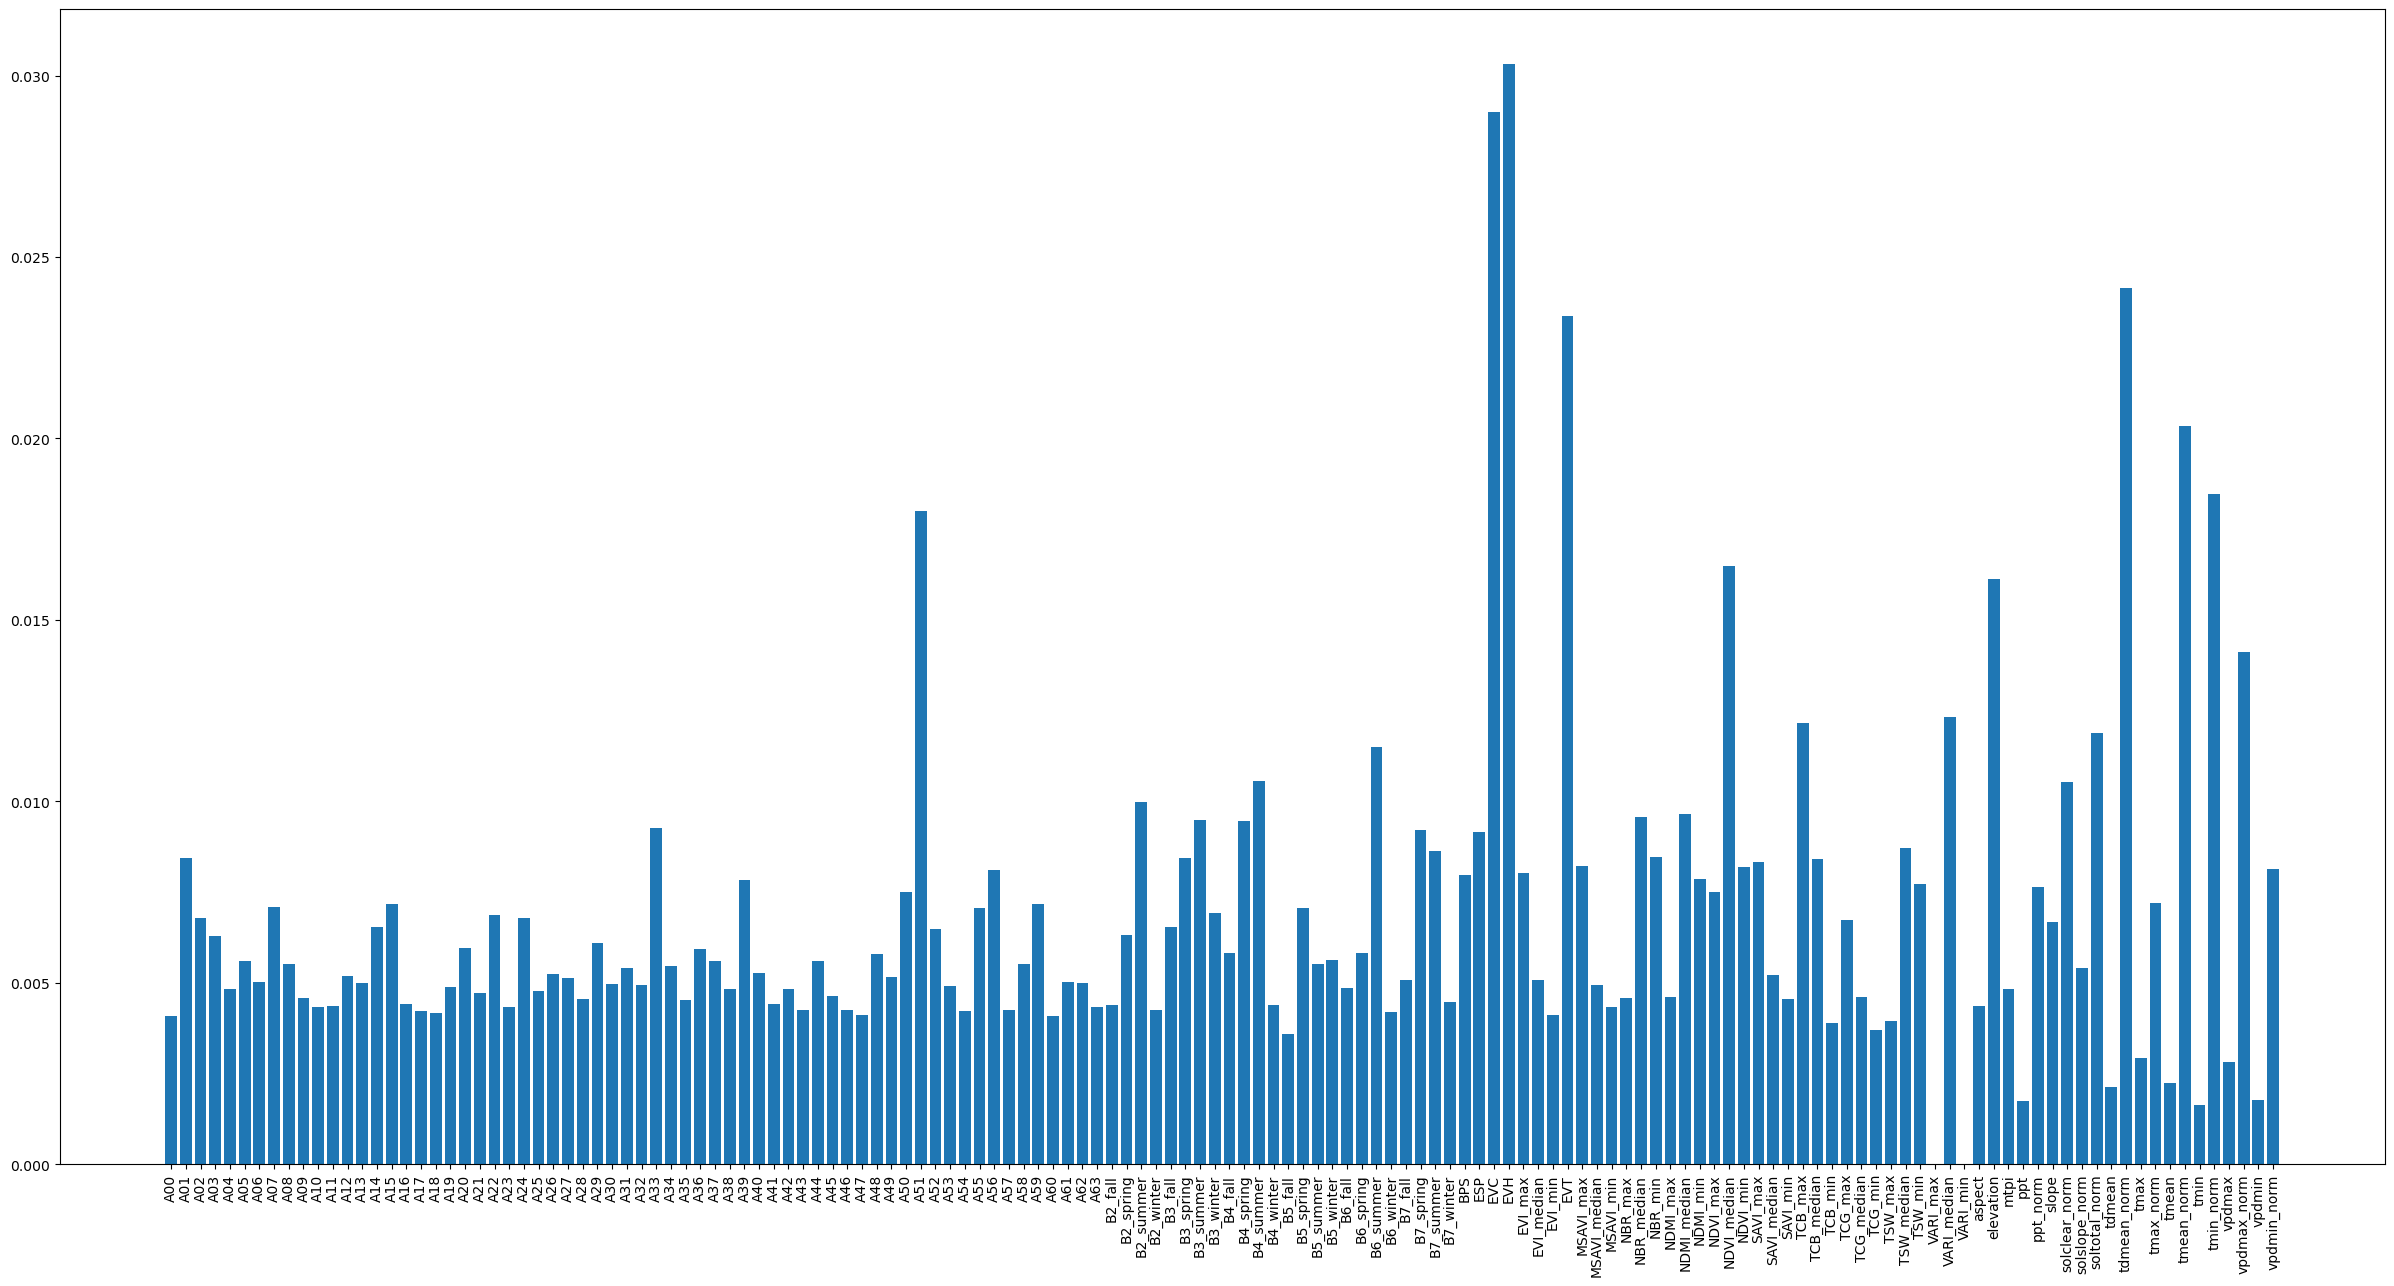

In [10]:
plt.figure(figsize=(30,15))
plt.bar(fuels_data_full.columns.to_list(),rf.feature_importances_)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
neighboring_pyrome_pred = rf.predict(eval_data_scaled)
print(classification_report(neighboring_pyrome_pred,eval_labels_encode))
print(confusion_matrix(neighboring_pyrome_pred,eval_labels_encode))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65      7611
           1       0.64      0.53      0.58     14465
           2       0.11      0.30      0.16      4410
           3       0.65      0.28      0.39     27755
           4       0.40      0.40      0.40     11934
           5       0.25      0.52      0.34      5840
           6       0.00      0.00      0.00         0

    accuracy                           0.43     72015
   macro avg       0.37      0.41      0.36     72015
weighted avg       0.53      0.43      0.44     72015

[[6416  163  600  114   20  298    0]
 [1292 7668 2250 1760  657  837    1]
 [1213 1110 1337  387  114  249    0]
 [2660 2757 6405 7766 4888 3266   13]
 [ 198  230 1045 1339 4823 4298    1]
 [ 221   72  363  634 1498 3052    0]
 [   0    0    0    0    0    0    0]]


/home/rpdemilt/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rpdemilt/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rpdemilt/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [11]:
import xgboost as xgb

# xgbclf = xgb.XGBClassifier()

# xgbclf.fit(X_train_scaled,y_train_encode)

# xgb_pred = xgbclf.predict(X_test_scaled)
# print(classification_report(y_test_encode,xgb_pred))
# print(confusion_matrix(y_test_encode,xgb_pred))

xgb_param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':[6,7,8]
}

xgb_cv = GridSearchCV(
    estimator=xgb.XGBClassifier(),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1   
)

xgbclf = xgb.XGBClassifier()

# xgb_cv.fit(X_train_scaled,y_train_encode)
xgbclf.fit(X_train_scaled,y_train_encode)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [12]:
xgb_pred = xgbclf.predict(X_test_scaled)
print(classification_report(y_test_encode,xgb_pred))
print(confusion_matrix(y_test_encode,xgb_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     10753
           1       0.63      0.63      0.63     10787
           2       0.54      0.40      0.46     10754
           3       0.63      0.71      0.67     10912
           4       0.65      0.71      0.68     10779
           5       0.59      0.60      0.60     10840
           6       0.91      0.95      0.93      3576

    accuracy                           0.66     68401
   macro avg       0.68      0.68      0.68     68401
weighted avg       0.65      0.66      0.65     68401

[[8383  795  534  350  145  525   21]
 [ 769 6808 1153  781  195 1070   11]
 [ 869 1741 4301 1961 1010  833   39]
 [ 278  656  950 7751  671  604    2]
 [ 101  231  469  708 7654 1467  149]
 [ 472  549  534  672 1983 6522  108]
 [  10    6    3    3   81   60 3413]]


In [13]:
neighboring_pyrome_pred = xgb_cv.predict(eval_data_scaled)
print(classification_report(neighboring_pyrome_pred,eval_labels_encode))
print(confusion_matrix(neighboring_pyrome_pred,eval_labels_encode))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# knn = KNeighborsClassifier(
#     n_neighbors=7,
#     metric='cosine',
#     weights='uniform'
# )

# knn.fit(X_train_scaled,y_train_encode)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(
#     n_neighbors=7,
#     metric='cosine',
#     weights='uniform'
# )

# knn.fit(X_train_scaled,y_train_encode)

# knn_pred = knn.predict(X_test_scaled)
# print(classification_report(y_test_encode,knn_pred))
# print(confusion_matrix(y_test_encode,knn_pred))

knn_param_grid = {
    'n_neighbors':[1,3,5,7,9,11],
    'metric':['l1','l2','cosine'],
    'weights':['uniform','distance']
}

knn_cv = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1   
)
knn_cv.fit(X_train_scaled,y_train_encode)

/home/rpdemilt/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['l1', 'l2', 'cosine'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [122]:
knn_cv.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=11, weights='distance')

In [45]:
knn_pred = knn_cv.predict(X_test_scaled)
print(classification_report(y_test_encode,knn_pred))
print(confusion_matrix(y_test_encode,knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3578
           1       0.66      0.72      0.69      3651
           2       0.55      0.42      0.47      3534
           3       0.65      0.71      0.68      3565
           4       0.61      0.65      0.63      3627
           5       0.59      0.53      0.56      3626
           6       0.88      0.95      0.91      3619

    accuracy                           0.68     25200
   macro avg       0.68      0.68      0.68     25200
weighted avg       0.68      0.68      0.68     25200

[[2873  271  136   90   63  124   21]
 [ 222 2626  337  245   56  145   20]
 [ 235  690 1474  496  294  286   59]
 [  23  220  328 2514  223  245   12]
 [  29   61  158  265 2365  509  240]
 [ 141  100  251  260  799 1938  137]
 [   8    4    5    4  101   63 3434]]


In [46]:
neighboring_pyrome_pred = knn_cv.predict(eval_data_scaled)
print(classification_report(neighboring_pyrome_pred,eval_labels_encode))
print(confusion_matrix(neighboring_pyrome_pred,eval_labels_encode))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62      7794
           1       0.75      0.43      0.55     21070
           2       0.16      0.23      0.19      8599
           3       0.38      0.27      0.31     16976
           4       0.31      0.39      0.34      9448
           5       0.25      0.37      0.30      8069
           6       0.00      0.00      0.00        59

    accuracy                           0.39     72015
   macro avg       0.34      0.35      0.33     72015
weighted avg       0.45      0.39      0.40     72015

[[6120  190  647  197   87  553    0]
 [2464 9050 4183 2858 1105 1406    4]
 [ 981  973 1961 1696 1606 1379    3]
 [1966 1509 3817 4559 2921 2197    7]
 [ 172  105  652 1410 3667 3441    1]
 [ 290  173  739 1275 2589 3003    0]
 [   7    0    1    5   25   21    0]]


In [ ]:
from sklearn.svm import SVC

svc_param_grid = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,1e-2,1e-4]
}

svc_cv = GridSearchCV(
    estimator=SVC(),
    param_grid=svc_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1   
)

# svc_cv.fit(X_train_scaled,y_train_encode)
svm = SVC()
svm.fit(X_train_scaled,y_train_encode)

In [ ]:
svc_pred = svm.predict(X_test_scaled)
print(classification_report(y_test_encode,svc_pred))
print(confusion_matrix(y_test_encode,svc_pred))

---

Perform Hierarchichal Classification

---

In [76]:
import sklearn

subclass_map = {
    1:[91,92,93,98,99],
    2:[101,102,103,104,105,106,107,108,109],
    3:[121,122,123,124],
    4:[141,142,143,144,145,146,147,148,149],
    5:[161,162,163,164,165],
    6:[181,182,183,184,185,186,187,188,189],
    7:[201,202,203,204]
}

def fit_hierarchical_classifiers(train_data,train_labels,template_estimator):
    # data: samples X features
    # labels: samples X 2 (specific and general)

    top_level = train_labels[:,1]
    low_level = train_labels[:,0]

    scaler = StandardScaler()
    encoder = LabelEncoder()
    encoder.fit(list(subclass_map.keys()))

    train_data_scaled = scaler.fit_transform(train_data)
    top_level_encode = encoder.transform(top_level)

    top_level_clf = sklearn.base.clone(template_estimator)

    top_level_clf.fit(train_data_scaled,top_level_encode)
    print('fit parent classifier')

    model_dict = {
        'parent':{
            'clf':top_level_clf,
            'scaler':scaler,
            'encoder':encoder
        },
        'child':{
            
        }
    }

    for i in subclass_map.keys():
        print(f'fitting classifier for child class {i}')
        subclass_idxs = np.argwhere(top_level == i)

        subclass_labels = low_level[subclass_idxs[:,0]]
        subclass_data = train_data_scaled[subclass_idxs[:,0]]

        subclass_clf = sklearn.base.clone(template_estimator)
        subclass_encoder = LabelEncoder().fit(subclass_map[i])

        subclass_labels_encode = subclass_encoder.transform(subclass_labels)
        
        subclass_clf.fit(subclass_data,subclass_labels_encode)

        model_dict['child'][i] = {}
        model_dict['child'][i]['encoder'] = subclass_encoder
        model_dict['child'][i]['clf'] = subclass_clf

    return model_dict

def predict_hierarchical_classes(pred_data,model_dict):
    scaler = model_dict['parent']['scaler']
    parent_model = model_dict['parent']['clf']

    pred_data_scaled = scaler.transform(pred_data)

    parent_preds = parent_model.predict(pred_data_scaled)

    child_preds = np.zeros_like(parent_preds)
    for i in np.unique(parent_preds):
        child_model = model_dict['child'][(int(i)+1)]['clf']
        child_encoder = model_dict['child'][(int(i)+1)]['encoder']

        subclass_idxs = np.argwhere(parent_preds == i)

        subclass_data_scaled = pred_data_scaled[subclass_idxs[:,0]]
        subclass_pred = child_model.predict(subclass_data_scaled)
        subclass_pred = child_encoder.inverse_transform(subclass_pred)

        child_preds[subclass_idxs[:,0]] = subclass_pred

    return parent_preds, child_preds

In [84]:
seed = 1917
test_pct = .3

rf = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_features='sqrt',
    n_jobs=-1
)

fuels_labels = fuels_sample[label_list]

fuels_data_alphaearth = fuels_sample[alphaearth_features]
fuels_data_wo_alphaearth = fuels_sample[feature_list_wo_alphaearth]
fuels_data_full = fuels_sample[alphaearth_features + feature_list_wo_alphaearth]

X_train, X_test, y_train, y_test = train_test_split(fuels_data_full.to_numpy(), fuels_labels.to_numpy(),test_size=test_pct,random_state=seed)

X_train = np.nan_to_num(X_train,0)
X_test = np.nan_to_num(X_test,0)

model_dict = fit_hierarchical_classifiers(X_train,y_train,rf)

fit parent classifier
fitting classifier for child class 1
fitting classifier for child class 2
fitting classifier for child class 3
fitting classifier for child class 4
fitting classifier for child class 5
fitting classifier for child class 6
fitting classifier for child class 7


In [92]:
parent_preds, child_preds = predict_hierarchical_classes(X_test,model_dict)

parent_encoder = model_dict['parent']['encoder']

parent_classes = parent_encoder.transform(y_test[:,1])


full_label_encoder = LabelEncoder().fit(np.unique(fuels_labels.to_numpy()[:,0]))

y_train_child_encode = full_label_encoder.transform(y_train[:,0])
y_test_child_encode = full_label_encoder.transform(y_test[:,0])


full_pred_model = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_features='sqrt',
    n_jobs=-1
)

full_pred_model.fit(X_train_scaled,y_train_child_encode)
pred = full_pred_model.predict(X_test_scaled)

class_mapper = dict(zip(from_vals,to_vals))

pred_decode = full_label_encoder.inverse_transform(pred)

u, inv = np.unique(pred_decode,return_inverse=True)
straight_prediction_parent_classes = np.array([class_mapper[x] for x in u])[inv]

straight_prediction_accuracy =  accuracy_score(y_test_child_encode,pred)
straight_prediction_parent_accuracy = accuracy_score(y_test[:,1],straight_prediction_parent_classes)

parent_accuracy = accuracy_score(parent_classes,parent_preds)
child_accuracy = accuracy_score(child_preds,y_test[:,0])

print(f'Hierarchical Parent Class Accuracy: {parent_accuracy}')
print(f'Hierarchical Child Class Accuracy: {child_accuracy}')

print(f'Non-Hierarchical Child Class Accuracy: {straight_prediction_accuracy}')
print(f'Non-Hierarchical Parent Class Accuracy: {straight_prediction_parent_accuracy}')

Hierarchical Parent Class Accuracy: 0.686904788017273
Hierarchical Child Class Accuracy: 0.5944841504096985
Non-Hierarchical Child Class Accuracy: 0.5962698459625244
Non-Hierarchical Parent Class Accuracy: 0.6709920763969421
